
# BATUHAN DEDEOĞLU



### Örnek 2)

In [74]:
#Gerekli kütüphaneleri çağırdık
import numpy as np                  
import matplotlib.pyplot as plt

from scipy import signal as sgnl  #temel sinyal işleme kütüphanemiz
from scipy.fftpack import fft, ifft

%matplotlib notebook 

import SystemFunction #Bizim tanımlayacağımız fonksiyonları çağırabilmek için gerekli (bize hazır olarak verilmiştir.)

In [75]:
N=400   # 400 örneklik dizi oluşturuyoruz
M=60    # pencere boyutumuz tanımlandı

n=np.arange(0,M+1,1)    #zaman vektörümüzü tanımladık
wn=0.54-0.46*np.cos(2*np.pi*n/M)  #hamming penceresini tanımladık

In [76]:
#frekans bileşenlerimizin pecereleme işlemi yapılarak tanımlanması
x_1=wn*np.cos(0.2*np.pi*n)        
x_2=wn*np.cos(0.4*np.pi*n-np.pi/2)
x_3=wn*np.cos(0.8*np.pi*n+np.pi/5)

#soruda verilen e frekans bileşeninden oluşan x[n] işaretimizin oluşturulması
x_n=np.concatenate((x_3,x_1,x_2, np.zeros(N-3*len(n))), axis=None)

#np.concatenate() komutumuz tanımladığımız işaretleri belirli bir eksen üzerinde birleştirmeye yarıyor. 

<IPython.core.display.Javascript object>


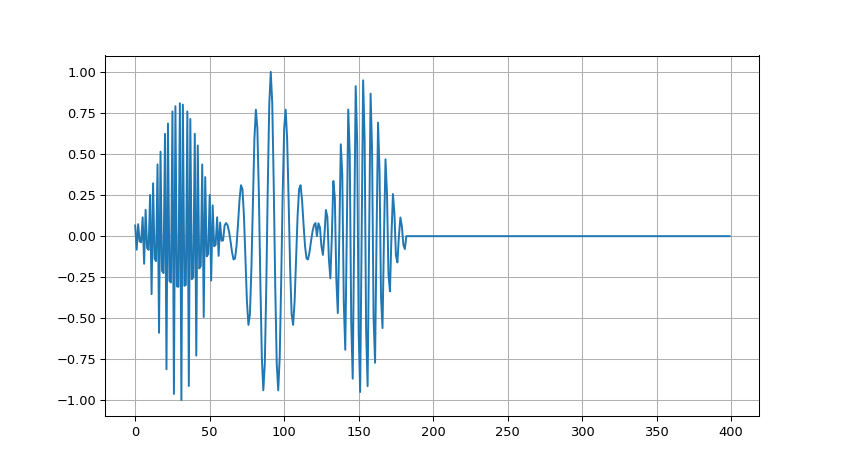

In [77]:
#x[n] işaretimizin çizdirilmesi

plt.figure(figsize=(9,5))
plt.plot(x_n)
plt.grid()
plt.show()

**Yorum:** 

Bize verilen x[n]=x_3[n]+x_1[n-M-1]+x_2[n-2M-2] işaretinin bileşenlerinin pencerelenmiş halleri ile x[n] işaretimizi çizdirdik.  Bu işaretler aynı zaman aralığında tanımlıdırlar. Her bileşen M+1 elemanlı olacağından 3*61=183 elemanlı x[n] işaretimizi elde etmiş olduk. 
    
   *Görüldüğü üzere;
    x_3[n] en yüksek frekanslı bileşen olduğundan en sık salınan bileşen olarak görülüyor. x_1[n] en düşük frekanslı bileşen
    dolayısızla daha yavaş salınan bileşen olarak görülüyor. x_2[n] en sonda görünüyor.*

Bu işareti frekans domaininde sisteme uygulayacağımız için fourier transformunu alıyoruz. Giriş işaretimiz [−𝜋,𝜋]  rad/samples aralığında tanımlandığı için fourier dönüşümümüzde bu aralıkta tanımlanmalıdır bu yüzden fft.fftshift() komutunu kullanmamız gerekmektedir.

In [78]:
#işaretimizin Fourier Transformunun elde edilmesi
w=np.linspace(-np.pi,np.pi,N)
Xw=fft(x_n)
Xw_shifted=np.fft.fftshift(Xw)

In [79]:
#Bize verilen frekans cevabının tanımlanması systemFunctiondan çağırılması
Hw, polezz, zerozz, K=SystemFunction.SystemFunction(w)

Hw_mag=abs(Hw)
Hw_phs=np.unwrap(np.angle(Hw))

<IPython.core.display.Javascript object>


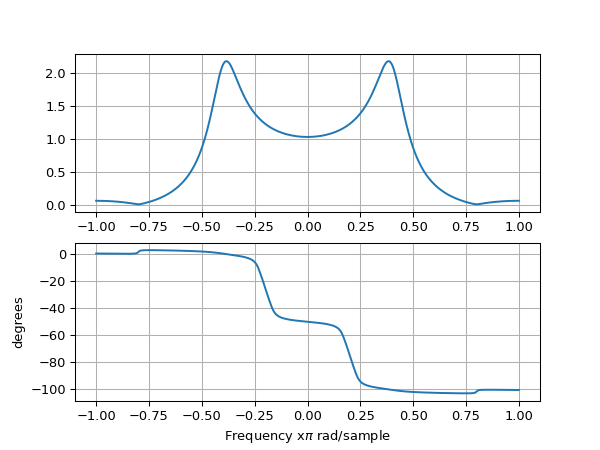

In [80]:
plt.figure()

#genlik değerlerimizin çizdirilmesi
plt.subplot(211)
plt.plot(w/np.pi, Hw_mag)
plt.grid()

#faz değerlerinin çizdirilmesi
plt.subplot(212)
plt.plot(w/np.pi,Hw_phs)
plt.ylabel('degrees')
plt.xlabel('Frequency x$\pi$ rad/sample')
plt.grid()

plt.show()

**YORUM:**

**Genlik cevabından edinebileceğimiz bilgi;**
*LTI sistemde giriş işaretindeki frekans bileşenlerini biliyoruz, sistem çıkışındada bu frekans bileşenlerinin sistemin genlik cevabıyla çarpılmışı olarak çıkış işaretini elde ederiz.*

   *x_1[n] bileşenimiz 0.2𝜋 frekanslıydı. 0.2𝜋 değerindeki genlik değerimizi okuduğumuzda 1.22 olduğunu görüyoruz dolayısıyla x_1[n] bileşeninin çıkış işaretinde 1.22 katı olduğunu görmüş olacağız. x_2[n] bileşenimizin frekansı 0.4𝜋 frekansa sahip bu değerdeki genlik büyüklüğümüz 2.1 olduğundan çıkış işaretimizde 2.1 katını görmüş olacağız. Bu iki bileşen kuvvetlenerek çıkarken, x_3[n] bileşenimiz için 0.8𝜋 frekans değerimiz genlik değeri olarak yaklaşık 0 a denk geldiği için sönümlenmiş bir şekilde görmeyi bekliyoruz.*

**Faz cevabından ise;** sistemin giriş işaretine, her bir frekans değerinde ne kadarlık zaman gecikmesi olduğunu anlarız. **Fakat bu gecikme faz cevabından doğrudan gözükmediği için grup geçikmesi olarak adalandırdığımız bir fonksiyon yardımıyla zamanda kayma bilgisini elde edeceğiz.**

<IPython.core.display.Javascript object>


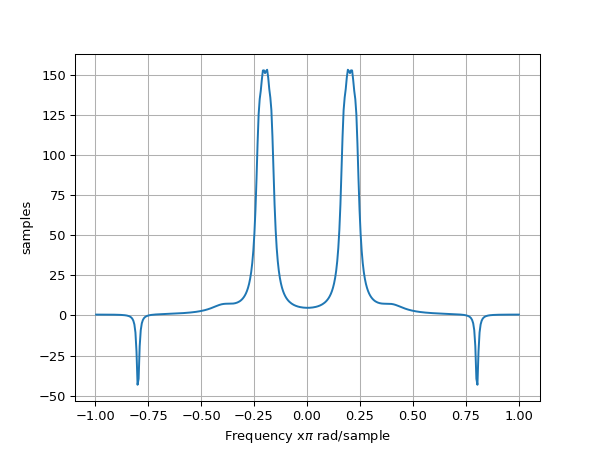

In [81]:
#Sistemin grup gecikmesinin hesaplanması
tau_w= -np.diff(Hw_phs)*(N/(2*np.pi))

#grup gecikmesinin çizdirilmesi
plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.ylabel('samples'), 
plt.xlabel('Frequency x$\pi$ rad/sample')
plt.grid()
plt.show()

**YORUM:**

Bu grafikte **grup gecikmesini** görüyoruz. **Grup gecikmesi faz cevabının açısal frekans ile türevlenmesinin negatifidir.** Giriş işaretindeki her bir frekans bileşeninin aldığı değerleri okursak bize o bileşenlerin çıkış işaretinde ne kadar zamanda kaymaya uğrayacağını gösterir. 

Şimdi sırasıyla bileşenleri inceleyelim.

*x_1[n] bileşenimiz 0.2𝜋 frekanslıyd. Faremizi 0.2pi değerine getirdiğimizde y ekseninde 151 örnek değerini görüyoruz. Bu çıkış işaretimizin giriş işaretimize göre bu frekans değerlerine sahip bileşenleri (0.2𝜋) 151 örnek gecikmeye uğrayacağını bize söylüyor.* **Grup gecikmemiz pozitif olduğu için geçikmeye uğrayacağını söyledik.**

*x_2[n] bileşenimiz 0.4𝜋 bileşenimiz için 8.1 örnek değerini okuyoruz ve grup gecikmemiz yine pozitif. Bu çıkış işaretimiz 0.4𝜋 frekans değerlerine sahip bileşenlerde 8.1 örneklik geçikmeye uğrayacak.*

*x_3[n] bileşenimiz 0.8𝜋 bileşenimiz için -43 örnek değeri okunuyor.* **Grup gecikmemiz negatif olacağından** *dolayı çıkış işaretimiz bu frekans değerlerine sahip bileşenler için -43 örnek zamanda öne kayacağını söylüyor. Bu durum **sistemimizin nedenselliğini bozar** *ama x_3[n] işaretimizin genlik cevabında gördüğümüz gibi çıkışta sönümlenmiş olacağından bu etkiyi net bir şekilde göremeyeceğiz.*

In [82]:
Yw_shifted=Hw*Xw_shifted          #frekans uzayında giriş işaretimizi sisteme uyguluyoruz
Yw=np.fft.ifftshift(Yw_shifted)   # çıkış işaretimizi frekans domaininde elde ediyoruz
y_n=np.real(ifft(Yw))             #ters dönüşümünü alıp zaman domainine geçiş yapıyoruz

<IPython.core.display.Javascript object>


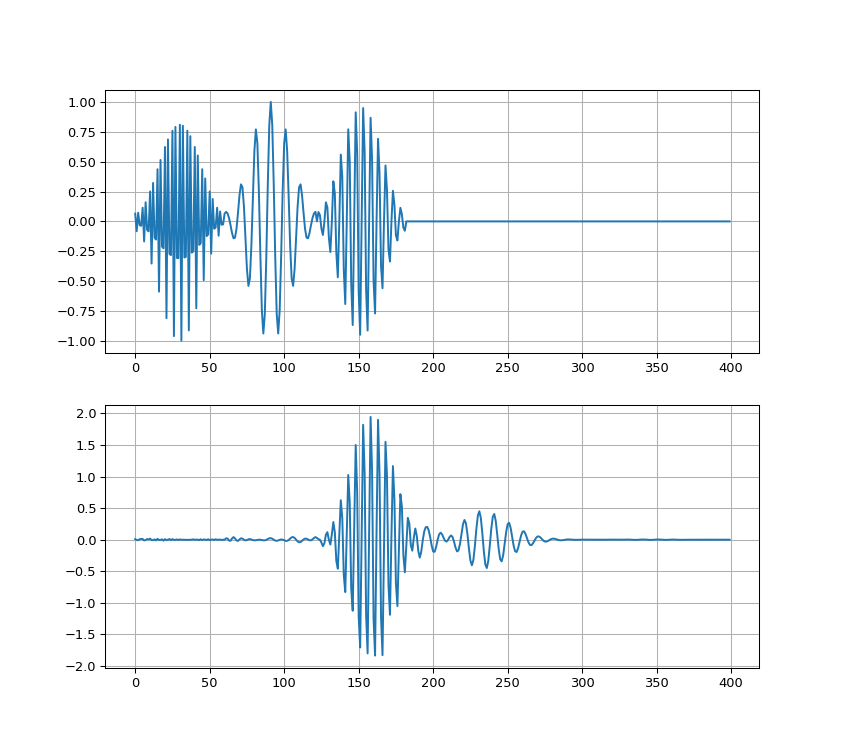

In [83]:
plt.figure(figsize=(9,8))

#giriş ifadesinin çizdirilmesi
plt.subplot(211)
plt.plot(x_n)
plt.grid()

#çıkış işaretinin çizdirilmesi
plt.subplot(212)
plt.plot(y_n)
plt.grid()

plt.show()

**YORUM:**

*x_1[n], 0.2𝜋 frekanslı bileşenimiz girişte 90. örnek civarlarındayken sistem çıkışımızda 235. örneğe kaymış. Genliği neredeyse yarıyarıya azalmış.* **Genliğinin azalmış olması nümerik hassasiyetten kaynaklıdır. Yani fft alırken eğer N nokta sayısını artırırsak çıkıştaki genliklerin beklediğimiz çıkış işaretine çok daha yakın bir sonuç verdiğini görebiliriz.**


*x_2[n], 0.4𝜋 frekanslı bileşenimiz girişte 150. örnek civarlarındayken sistem çıkışımızda 158. örnek civarlarına kaymııştır genliği neredeyse iki katına çıkmıştır çünkü genlik cevabında incelediğimiz gibi çıkış işaretimizin giriş işaretinin yaklaşık 2.1 katı büyüklüğünde görmemiz gerektiğini göylemiştik.*

*x_3[n], 0.8𝜋 frekanslı bileşenimiz ise genlik cevabında belirttiğimiz gibi sönümlenmiştir.*

Ayrıca çıkış işaretimizde x_2[n] bileşeni, x_1[n] bileşenimizin gerisinde kalmış yani daha az geçikmeye uğramış doğlayısıyla işaretimizde bir bozulma var (distortion). **Grup gecikmemiz her bir frekansımızda farklı değer almasından yani sabit olmamasından dolayı farklı frekans bileşenleri farklı miktarlarda zamanda kaymış dolayısıyla bozulma meydana gelmiş.**


### Örnek 3)

In [87]:
#örnek sayımız ve çizdireceğimiz indisin tanımlanması
N=400   # 400 örneklik dizi oluşturuyoruz
M=60    # pencere boyutumuz tanımlandı

n=np.arange(0,M+1,1)    #zaman vektörümüzü tanımladık
wn=0.54-0.46*np.cos(2*np.pi*n/M)  #hamming penceresini tanımladık

In [88]:
#filtemizin bize verilen fonksiyona göre tanımlanması
hn=np.ones(5)
Hw=np.fft.fftshift(fft(hn,N))

#filtremizin frekans domaininde incelenmesi
Hw_mag=abs(Hw)                  #genlik cevabının bulunması
Hw_phs=np.unwrap(np.angle(Hw))  #unwrap() komutu bize sıkıştırılmamış faz cevabını veriyor

<IPython.core.display.Javascript object>


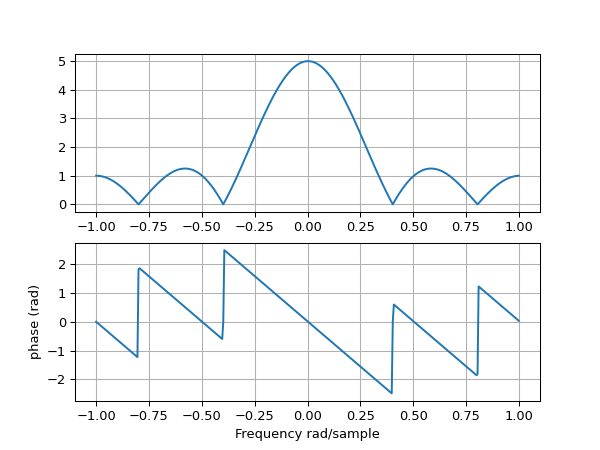

In [89]:
plt.figure()

#genlik cevabının çizdirilmesi
plt.subplot(211)
plt.plot(w/np.pi, Hw_mag)
plt.grid()

#faz cevabının çizdirilmesi
plt.subplot(212)
plt.plot(w/np.pi, Hw_phs)
plt.ylabel("phase (rad)")
plt.xlabel("Frequency rad/sample")
plt.grid()

plt.show()

<IPython.core.display.Javascript object>


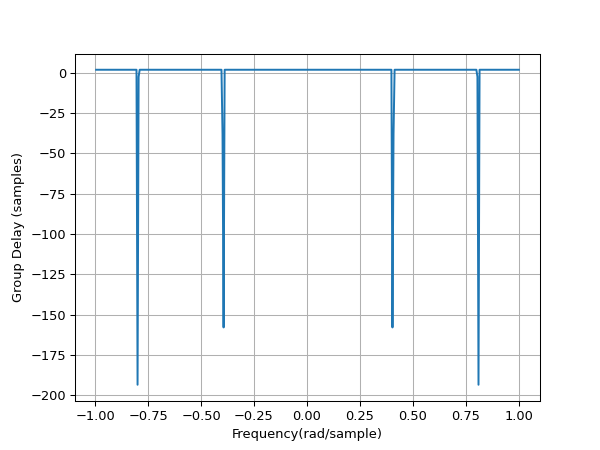

In [90]:
#grup gecikmesinin formule göre tanımlanması
tau_w=-np.diff(Hw_phs)*(N/(2*np.pi))
                                     
#doğrud grup geçikmesini görebilmek için uygun fft nokta uzunluğuyla yani N/2pi ile ölçekliyoruz
# bunu yapmazsak büyüklüğü örnek cinsinden olmaz

#grup gecikmesi diyagramının çizdirilmesi
plt.figure()

plt.plot(w[1::]/np.pi,tau_w)
#sayısal türev aldığımızda elde ettiğimiz vektörün uzunluğu orijinal vektöre göre bir azalır dolayısıyla.
#frekans vektöründe ilk örneği atıyoruz, iki vektörün boyları eşit olur.


plt.xlabel("Frequency(rad/sample)")
plt.ylabel("Group Delay (samples)")
plt.grid()
plt.show()

*Genlik değerlerinin sıfır olduğu yerlerde veya faz cevabının süreksizliğe sahip olduğu yerlerde farklı kaymalar gözüküyor fakat faz cevabının sürekli olduğu araklıklardaki değeri dikkate aldığımızdan dolayı;* **grup gecikmemizin 2 olduğunu görüyoruz.** *Hesapladığımız değer ile aynı bulunmuştur.*

Şimdi filtremize giriş işareti uygulayalım.

In [91]:
#giriş işaretimizin tanımlanması
n= np.arange(0, N, 1)
w0=0.1*np.pi

xn=np.cos(w0*n) #griş işaretimizi cos fonksiyonu olarak tanımladık

#giriş işaretinin Fourier transformunun hesaplanması
Xw=np.fft.fftshift(fft(xn,N))

In [92]:
#filtrenin çıkış işaretinin frekans domaininde hesaplanması
Yw_shifted= Hw*Xw

#zaman domainine dönüş yapmak için ters fourier dönüşümü alıyoruz
Yw=np.fft.ifftshift(Yw_shifted)
yn=np.real(ifft(Yw))

<IPython.core.display.Javascript object>


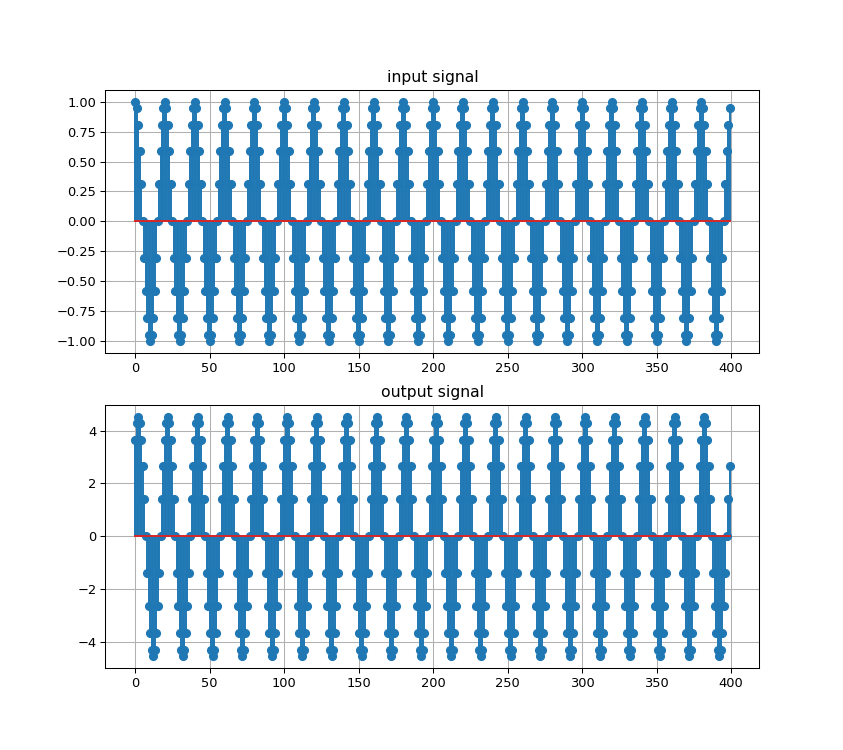

In [93]:
plt.figure(figsize=(9,8))

#giriş işaretinin çizdirilmesi
plt.subplot(211)
plt.stem(n,xn,use_line_collection=True)
plt.title("input signal")
plt.grid()

#çıkış işaretinin çizdirilmesi
plt.subplot(212)
plt.stem(n,yn,use_line_collection=True)
plt.title("output signal")
plt.grid()

plt.show()

 **YORUM:** 
 
 *Oluşturmuş olduğumuz cos işaretimizin frekansı 0.1𝜋 dir.*
*Filtremizin genlik cevabından incelediğimizde; 0.1𝜋 frekans değerinde, çıkışta 4.5 kat genlik büyümesi bekledik. Grup gecikmesi diyagramından incelediğimizde; 0.1𝜋  frekans değerindeki grup gecikmemizin 2 örnek olduğunu görüyoruz dolayısıyla işaretimizin çıkışınında 2 örnek sağ kaymış olduğunu bekledik.*
*Çıkış işaretimiz ile giriş işaretimizi incelediğimizde, giriş işaretimizin ilk tepe noktası 0 da ve genlik değeri cos işareti olduğu içi 1 dir. Çıkış işaretimizin ilk tepe noktasının 2 noktasında yani 2 örneklik grup gecikmesini görüyoruz ve genlik değerinin 4.5 olduğunu görüyoruz.* **Grup gecikmesinden ve filtremizin genlik cevabından bularak beklediğimiz değerlerin çıktı işaretimizde gerçekleştiğini görüyoruz.**

*Şimdi giriş işaretimizin frekans değerlerini değiştirerek Filtremizin genlik cevabı ve grup geçikmesi diyagramından nasıl çıktılar beklediğimizi yorumlayıp bunları kod ile doğrulayalım*

*Giriş işaretimiz cos(0.4𝜋n) seçilirse;
Genlik cevabından, 0.4𝜋 frekans değerindeki fonksiyonlar için genliğimizin 0.4 katı olacağını söyleyebiliriz. Genliğimiz çok azalacaktır.
Grup gecikmesi diyagramından, 0.4𝜋 frekans değerindeki grup gecikmemizin yoklaşık -4 örnek olacağını görüyoruz. Yani sinyalimiz 4 örnek öne çekilecektir. Grup gecikmemizin negatif olmasındandolayı bu sistemin nedenselliğini bozacaktır.*

*Giriş işaretimiz cos(0.6𝜋n) seçilirse;
Genlik cevabından, 0.6𝜋 frekans değerindeki fonksiyonlar için genliğimizin çıkış işaretinde 1,24 katı olacağını söyleyebiliriz.
Grup gecikmesi diyagramında; 0.6𝜋 frekans değerindeki giriş işaretimizin, çıkışta grup gecikmesinin 2 örnek olacağını görüyoruz.*


### Örnek 4)

In [94]:
#Bu kütüphaneyi oluşturduğumuz .mat formatındaki filtremizi kullanabilmek için çağırıyoruz
from scipy.io import loadmat

In [95]:
#Filtremizin çağrılması 

filter_data=loadmat("butterworth.mat")     # pyfda de oluşturulan filtremizin çağrılması
Coeffs=filter_data["ba"].astype(np.float)  # b,a katsayılarımızın stringten floata dönüştürülmesi
#b ve a katsayılarımızı oluşturduğumuz filtre içinde görebiliyoruz kaydettiğimizde string formatında oldukları için
#bu kat sayıları float cinsine dönüştürmemiz lazım.

b=Coeffs[:,0]  #birinci sütun b
a=Coeffs[:,1]  #ikinci sütun a (IIR filtrelerinde sadece a katsayıları bulunur)

**Filtremizin genlik ve faz cevaplarının incelenmesi**

In [96]:
#Oluşturulan filtremizin genlik ve faz cevaplarının çizdirilmesi

w, Hw=sgnl.freqz(b,a)  

Hw_mag=abs(Hw)                 #filtremizin genlik cevabı
Hw_phs=np.unwrap(np.angle(Hw)) #filtremizin faz cevabı

<IPython.core.display.Javascript object>


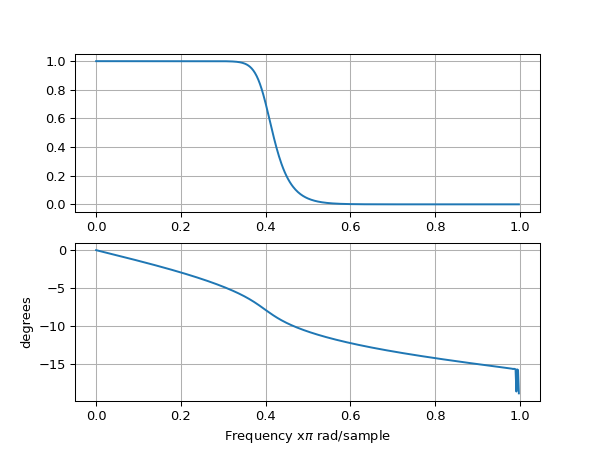

In [97]:
plt.figure()

#filtremizin genlik cevabının çizdirilmesi
plt.subplot(211)
plt.plot(w/np.pi,Hw_mag)
plt.grid()

#filtremizin faz cevabının çizdirilmesi
plt.subplot(212)
plt.plot(w/np.pi,Hw_phs)
plt.ylabel("degrees")
plt.xlabel("Frequency x$\pi$ rad/sample")
plt.grid()

plt.show()

**Filtremizin Dürtü cevabının incelenmesi**

<IPython.core.display.Javascript object>


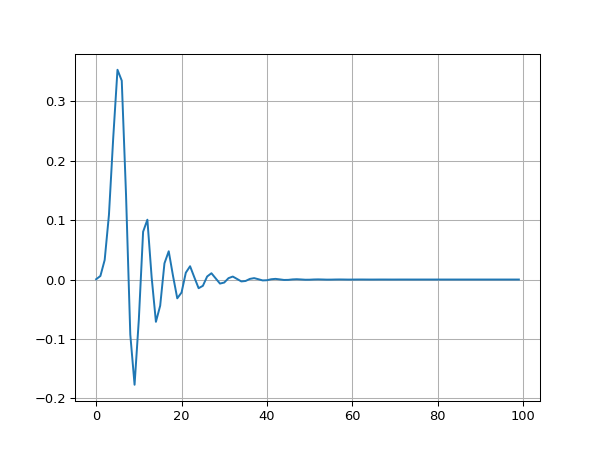

In [98]:
n,hn=sgnl.dimpulse((b,a,1), n=100)

plt.figure()
plt.plot(n,np.squeeze(hn))
plt.grid()
plt.show()

*Örnek-2* *de oluşturduğumuz x[n] sinyaline bu filtreyi uygulayıp çıkış işaretimiz y[n]'i elde edelim. x[n] işaretini örnek-2 de x_n olarak tanımlamıştık bu yüzden tekrardan bu kısımda tanımlamıyorum.*

***b ve a katsayılarımızı kullanarak giriş işaretimizi filtreden geçirdik ve çıkış işaretimiz y[n]'i elde ettik***

<IPython.core.display.Javascript object>


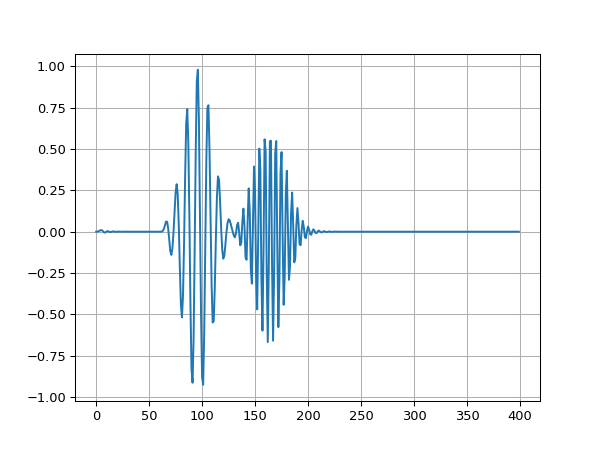

In [99]:
#çıkış işaretimizin elde edilmesi 
yn=sgnl.lfilter(b,a,x_n)

#ve çizdirilmesi
plt.figure()

plt.plot(yn)
plt.grid()
plt.show()

***YORUM:***
*x[n] işaretimizi pyfda da oluşturulan Butterworth filtremizle filtrelediğimizde y[n] çıkış işaretiniz elde ettik. Görüldüğü üzere giriş işaretinden farklı olaran 0.8pi frekans değerindeki x3[n] bileşenimiz söndürülmüştür. Demekki uyguladığımız filtre alçak geçiren bir filtre olabilir. 0.4Pİ VE 0.2ppi değerindeki sinyallerimiz çıkışta tekrardan elde edilmiştir.*

# Ön Hazırlık Soruları (ÖDEV)
# Soru-1)

In [100]:
#Gerekli kütüphaneleri çağırdık
import numpy as np                  
import matplotlib.pyplot as plt

from scipy import signal as sgnl  #temel sinyal işleme kütüphanemiz
from scipy.fftpack import fft, ifft
import zplane
%matplotlib notebook 

In [101]:
N=100                       #100noktalık indis tanımlıyoruz
w=np.linspace(0,2*np.pi,N)  #açısal frekans aralığımız

### Type-I Filtremiz
*Filtre derecemiz M çift olmalı dolayısıyla 5 elemanlı bir dürtü tanımlarsak 0-4 aralığında tanımlanacağı için M=4 olur ve derecemiz çift olmuş olur.*

*h[n] işaretimiz simetrik olmalıdır yani M/2=4/2=2 noktasını simetri ekseni seçersek karşılıklı örnekler birbirlerinin aynısı olmalı.*

In [102]:
#Type-I filtremizin yukarıda belirttiğimiz özelliklere göre tanımlanması
hn1=np.array([1,1,1,1,1])

Hw1=fft(hn1,N)       #İşaretimizin Fourier dönüşümünün alınması
Hw1_gen=abs(Hw1)                  #genlik cevabının bulunması
Hw1_faz=np.unwrap(np.angle(Hw1))  #unwrap() komutu bize sıkıştırılmamış faz cevabını veriyor

tau_w1= -np.diff(Hw1_faz)*(N/(2*np.pi))  #Grup gecikmesinin hesaplanması

<IPython.core.display.Javascript object>


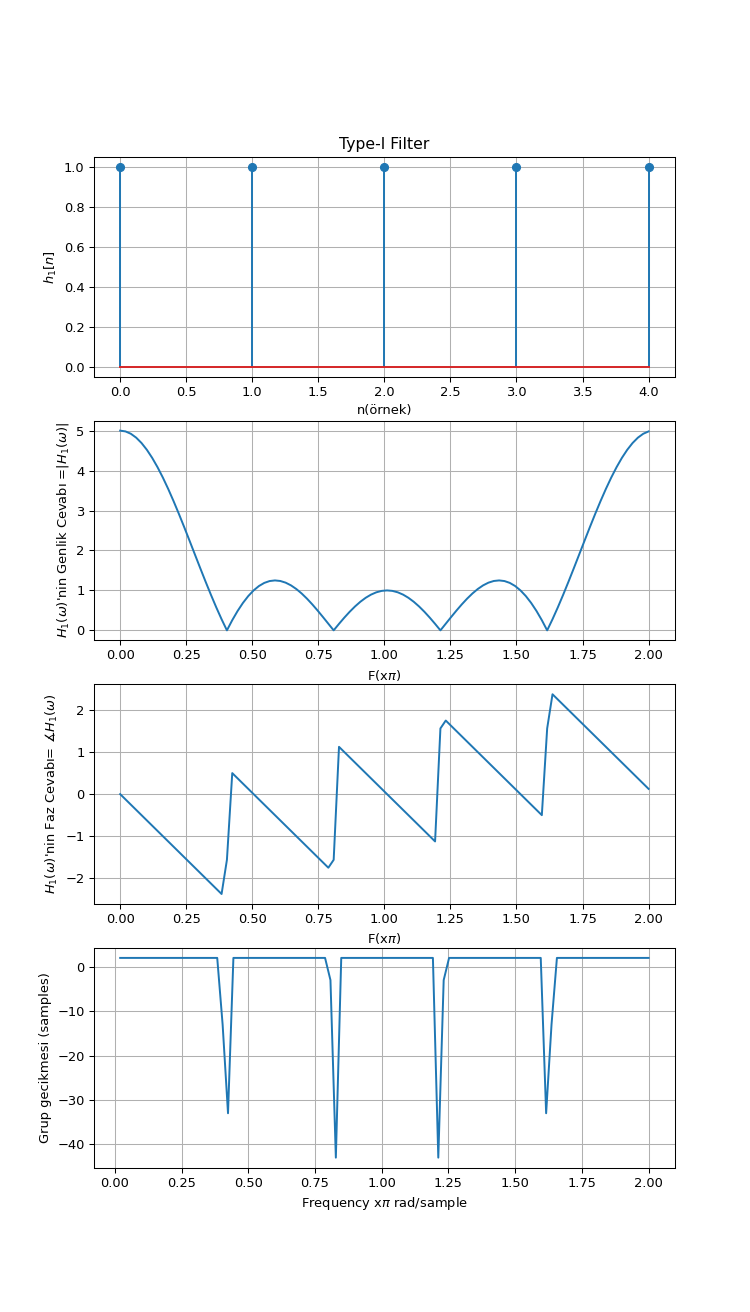

In [103]:
#Type-I filtremizin çizdirilmesi
plt.figure(figsize=(8,14))

plt.subplot(411)   #Filtremizin zaman domaininde çizdirilmesi
plt.stem(hn1,use_line_collection=True)
plt.title("Type-I Filter")
plt.xlabel("n(örnek)")
plt.ylabel("$h_1[n]$")
plt.grid()

plt.subplot(412)  #Genlik cevabının çizdirilmesi
plt.plot(w/np.pi,Hw1_gen)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_1$($\omega$)'nin Genlik Cevabı =|$H_1$($\omega$)|")
plt.grid()

plt.subplot(413)  #Faz cevabının çizdirilmesi
plt.plot(w/np.pi,Hw1_faz)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_1$($\omega$)'nin Faz Cevabı= $ \measuredangle$$H_1$($\omega$)")
plt.grid()

plt.subplot(414)  #Grup gecikmesi diyagramının çizdirilmesi
plt.plot(w[1::]/np.pi, tau_w1)
plt.ylabel('Grup gecikmesi (samples)')
plt.xlabel('Frequency x$\pi$ rad/sample')
plt.grid()

plt.show()

***Filtrenin genlik cevabına bakarak ne iş yaptığını tahmin edelim:***

  *Çizdirdiğimiz genlik cevabında 0-𝜋 aralığında bakarsak bu filtreyi **Alçak geçiren** bir filtre olarak kullanabiliriz. 0.4𝜋 de kadar denk gelen  kısmı geçiş bandı olarak alırsak ondan sonra kalan kısım durdurma bandı olarak görülebilir.*

  *𝜋-2𝜋 aralığına bakarsak bu filtreyi **Yüksek geçiren** bir filtre olarak kullanabiliriz. 1.6𝜋 ye kadar olan kısım durdurma bandı olarak kullanılırsa, 1.6𝜋-2𝜋 aralığında olan kısım geçirme bandı olarak düşünülebilir.* 

  *Çizdirdiğimiz genlik cevabında 0-2𝜋 aralında 0.4𝜋 ve 1.6𝜋 aralığında gördüğümüz tepecikleri söndürme bandımız kabul edersek belirli bir bölgedeki geçişi sınırlıyor geri kalan frekans değerlerindeki sinyallere dokunmuyor. Bu yüzden **Bant söndüren** bir filtre olarak kullanabiliriz.*

*Genlik cevabımızı -𝜋 ve 𝜋  aralığında çizdirmiş olsaydık şu anki görüntümüzün 0,𝜋 ve 𝜋,2𝜋  aralıklarının yer değiştirmiş halini görürdük ve -0.4𝜋,0.4𝜋  aralığında bir tepe olduğunu görebilirdik. Bu aralığı geçiren ve bunun dışındaki aralıkları söndüren bir filtre olarak düşünebilirdik. Bu yüzden **Bant geçiren** bir filtre olabileceğini söyleyebilirdik.*
**(verilen frekans değerleri genlik cevabındaki şekillerin yerlerini tarif edebilmek için verilmiştir.)**

  *Type-1 Filtre tipini araştırdığımızda görüyoruz ki yapılan tahminler doğru çıkmıştır. Sonuç olarak Type-1 filtre tipi ile neredeyse her çeşit filtre tasarlanabilir.*


*Filtremizin lineer bir faza sahip olduğunu faz cevabından söyleybiliriz. Doğrusal olarak değiştiğini eğimdeğerlerinden görebiliyoruz. Ayrıza grup gecikmesi diyagramından incelediğimizde belli değerler hariç sabit bir grup gecikmesine sahip olduğunuda söyleyebilirz ve o değeri okuduğumuzda grup gecikmemizin 2 örnek olacağını söyleriz. Bu değer bizim filtremizin simetri ekseninin bulunduğu değer ile aynıdır.*

### Type-I Filtremizin Kutup-Sıfır diyagramının çizdirilmesi

***Sonlu uzunluklu ayrık zamanlı işaretin Z-dönüşümü, katsayıları işaretin aldığı değerlerden oluşan bir polinomdur ve aldığı değerler de sonlu olduğu için, Z-dönüşümü her zaman yakınsayacaktır, yani her zaman tanımlı olacaktır. Dolayısıyla, yakınsama bölgesi (Region of Convergence, ROC), z=0 hariç tüm z düzlemidir. Bu bütün FIR filtre tiplerimiz için geçerlidir.***

<IPython.core.display.Javascript object>


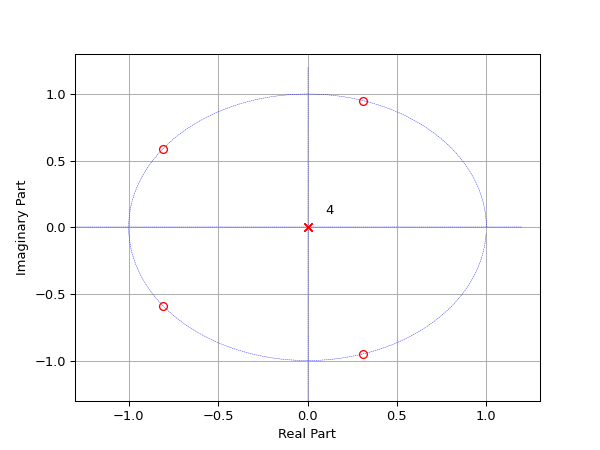

In [104]:
zplane.zplane(hn1,1)        #Filtremizin kutup-sıfır diyagramını çizmemiz için gereken komut.
#b payda kat sayıları hn1 işaretimiz ile aynıdır 
#İşaretimiz FIR filtre olduğundan dolayı a payda kısmı olmayacaktır işlemi yapabilmemiz için yerine 1 yazdım etkisiz eleman

**YORUM:** 

**Z = ± 1'de sıfırların varlığı, frekans seçici filtrelerin tasarımı için bu doğrusal faz fonksiyonlarının kullanımında bazı sınırlamalara yol açar. Bunun nedeni sistemin sıfırı birim çember üzerinde herhangi bir frekansa karşılık gelen Z noktasına ne kadar yakınsa, aradaki doğrunun boyu kısa olduğu için,o frekanstaki genlik cevabına etkisi o kadar fazla olmaktadır. Dolayısıyla o frekans değerinde düşük bir genlik oluşur. Özetle birim çembere konan sıfırlar, o frekansı bastırmaktadır.** Örneğin -1 noktasında sıfırımız olsaydı filtremizin genlik cevabında 𝜋 frekansına denk gelen kısımda genlik değerimiz düşük olacaktı bu yüzden yüksek geçiren bir filtre oluşturamayacaktık. Ek bilgi olarak ***Merkeze yerleştirilen sıfır ve kutubun birim çember üzerindeki her nokta ile uzaklığı eşit olduğu için genlik cevabına etkisi yoktur, faz cevabına ise doğrusal katkı yapmaktadır***

*Type-I filtremizin kutup-sıfır diyagramı incelendiğinde 1 ve -1 de sıfırların bulunmadığını görüyoruz. Dolayısıyla bu filtre tipimiz Yüksek geçiren, Alçak geçiren, Bant geçiren ve Bant söndüren filtreler tasarlamak için kullanılabilir nitelikte bir filtredir.*

### Type-II Filtremiz
*Filtre derecemiz M tek olmalı dolayısıyla 4 elemanlı bir dürtü tanımlarsak 0-3 aralığında tanımlanacağı için M=3 olur ve derecemiz tek olmuş olur.*

*h[n] işaretimiz simetrik olmalıdır yani M/2=3/2=1,5 noktasını simetri ekseni seçersek karşılıklı örnekler birbirlerinin aynısı olmalı.*

In [105]:
#Type-II filtremizin yukarıda belirttiğimiz özelliklere göre tanımlanması
hn2=np.array([1,1,1,1])

Hw2=fft(hn2,N)         #İşaretimizin Fourier dönüşümünün alınması
Hw2_gen=abs(Hw2)       #Genlik cevabının bulunması
Hw2_faz=np.unwrap(np.angle(Hw2))   #Faz cevabının bulunması

tau_w2= -np.diff(Hw2_faz)*(N/(2*np.pi))   #Grup gecikmesinin hesaplanması

<IPython.core.display.Javascript object>


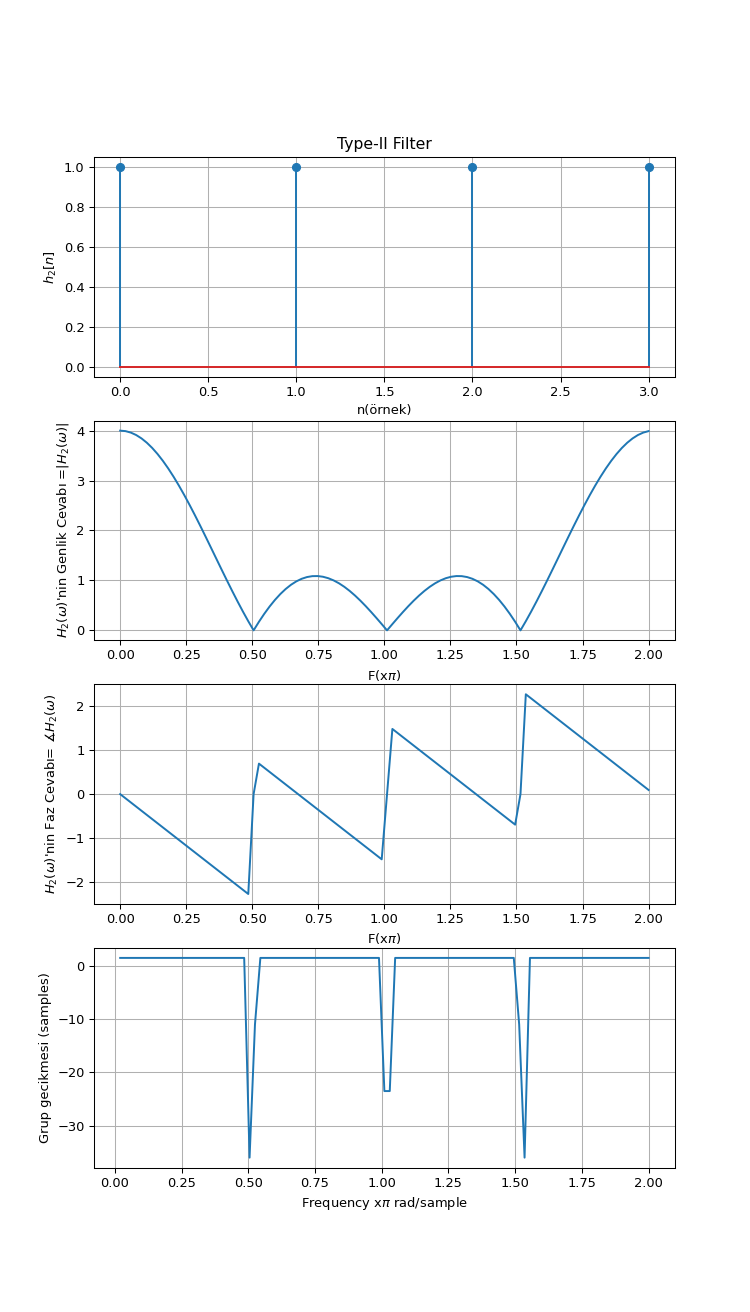

In [106]:
#Type-II filtremizin çizdirilmesi
plt.figure(figsize=(8,14))

plt.subplot(411)   #Filtremizin zaman domaininde çizdirilmesi
plt.stem(hn2,use_line_collection=True)
plt.title("Type-II Filter")
plt.xlabel("n(örnek)")
plt.ylabel("$h_2[n]$")
plt.grid()

plt.subplot(412)   #Genlik cevabının çizdirilmesi
plt.plot(w/np.pi,Hw2_gen)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_2$($\omega$)'nin Genlik Cevabı =|$H_2$($\omega$)|")
plt.grid()

plt.subplot(413)   #Faz cevabının çizdirilmesi
plt.plot(w/np.pi,Hw2_faz)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_2$($\omega$)'nin Faz Cevabı= $ \measuredangle$$H_2$($\omega$)")
plt.grid()

plt.subplot(414)   #Grup gecikmesi diyagramının çizdirilmesi
plt.plot(w[1::]/np.pi, tau_w2)
plt.ylabel('Grup gecikmesi (samples)')
plt.xlabel('Frequency x$\pi$ rad/sample')
plt.grid()

plt.show()

***Filtrenin genlik cevabına bakarak ne iş yaptığını tahmin edelim:***

  *Çizdirdiğimiz genlik cevabında 0-𝜋 aralığında bakarsak bu filtreyi **Alçak geçiren** bir filtre olarak kullanabiliriz. 0.5𝜋 de kadar denk gelen  kısmı geçiş bandı olarak alırsak ondan sonra kalan kısım durdurma bandı olarak görülebilir.*

  *𝜋-2𝜋 aralığına bakarsak bu filtreyi Yüksek geçiren bir filtre olarak kullanabiliriz. 1.5𝜋 ye kadar olan kısım durdurma bandı olarak kullanılırsa, 1.5𝜋-2𝜋 aralığında olan kısım geçirme bandı olarak düşünülebilir.* **(verilen frekans değerleri genlik cevabındaki şekillerin yerlerini tarif edebilmek için verilmiştir.)**

  *Çizdirdiğimiz genlik cevabında 0-2𝜋 aralında 0.5𝜋 ve 1.5𝜋 aralığında gördüğümüz tepecikleri söndürme bandımız kabul edersek belirli bir bölgedeki geçişi sınırlıyor geri kalan frekans değerlerindeki sinyallere dokunmuyor. Bu yüzden **Bant söndüren** bir filtre olarak kullanabiliriz.*



  *Type-II Filtre tipini araştırdığımızda görüyoruz ki yapılan tahminlerde yanlışlık vardır. **Type-II filtremiz Yüksek geçiren ve Bant geçiren filtre olarak kullanılamıyormuş** Bunun nedenine filtremizin kutup-sıfır diyagramını incelerken değineceğiz.*
  
  
  Filtremizin faz cevabından görüldüğü üzere doğrusal bir faza yani lineer bir faza sahip olduğunu söyleyebiliriz. Grup gecikmesi şemamızdan incelediğimizde ise sabit bir grup gecikmesine sahip olduğunu ve grup gecikmemizin 1.5örnek olduğunu söyleyebiliriz. Bu değer bizim filtremizin simetri ekseninin bulunduğu değer ile aynıdır.*


### Type-II Filtremizin Kutup-Sıfır diyagramının çizdirilmesi

<IPython.core.display.Javascript object>


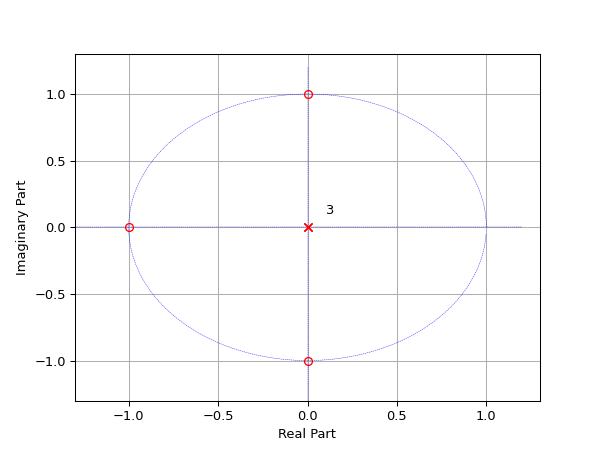

In [107]:
zplane.zplane(hn2,1)

**YORUM:** 

*Z = ± 1'de sıfırların varlığı, frekans seçici filtrelerin tasarımı için bu doğrusal faz fonksiyonlarının kullanımında bazı sınırlamalara yol açacağını ve birim çembere konan sıfırlar, o frekansı bastıracağını Type-I için kutup-sıfır diyagramını incelerken söylemiştik. Görüyoruzki Type-II filtremizin z=-1i j ve -j de sıfırları mevcuttur. z=-1 noktası bizim için 𝜋 değerine karşılık gelmektedir. z=-1 de bulunan sıfır genlik cevabında incelediğimizde 𝜋 frekansında bulunan işaretimizi bastıracağını söyleyebiliriz.* **Bu durumda Type-II filtremiz yüksek frekans değerindeki işaretleri bastıracağı için yüksek geçiren bir filtre olarak kullanamaz. Ayrıca bu frekans değerindeki işareti bastıracağı için Bant geçiren filtre olarakta kullanılamayız.**

### Type-III Filtremiz
*Filtre derecemiz M çift olmalı dolayısıyla 5 elemanlı bir dürtü tanımlarsak 0-4 aralığında tanımlanacağı için M=4 olur ve derecemiz çift olmuş olur.*

*h[n] işaretimiz anti-simetrik olmalıdır yani M/2=4/2=2 noktasını simetri ekseni seçersek karşılıklı örnekler birbirlerinin farklı olmalıdır.*

In [108]:
#Type-III filtremizin yukarıda belirttiğimiz özelliklere göre tanımlanması
hn3=np.array([1,-1,0,1,-1])

Hw3=fft(hn3,N)       #İşaretimizin Fourier dönüşümünün alınması
Hw3_gen=abs(Hw3)     #Genlik cevabımızın bulunması
Hw3_faz=np.unwrap(np.angle(Hw3))    #Faz cevabının bulunması

tau_w3= -np.diff(Hw3_faz)*(N/(2*np.pi))   #Grup gecikmesinin tanımlanması

<IPython.core.display.Javascript object>


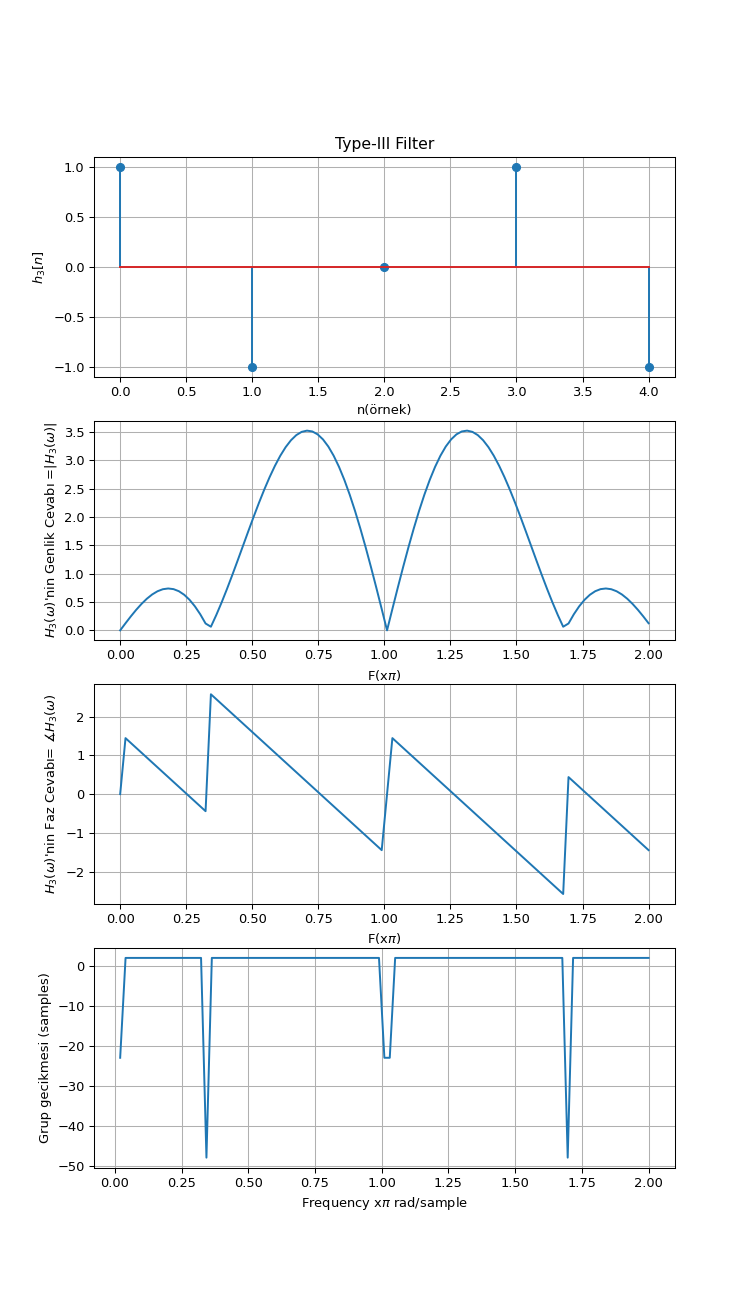

In [109]:
#Type-III filtremizin çizdirilmesi
plt.figure(figsize=(8,14))

plt.subplot(411)    #Filtremizin zaman domaininde çizdirilmesi
plt.stem(hn3,use_line_collection=True)
plt.title("Type-III Filter")
plt.xlabel("n(örnek)")
plt.ylabel("$h_3[n]$")
plt.grid()

plt.subplot(412)   #Genlik cevabının çizdirilmesi
plt.plot(w/np.pi,Hw3_gen)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_3$($\omega$)'nin Genlik Cevabı =|$H_3$($\omega$)|")
plt.grid()

plt.subplot(413)   #Faz cevabının çizdirilmesi
plt.plot(w/np.pi,Hw3_faz)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_3$($\omega$)'nin Faz Cevabı= $ \measuredangle$$H_3$($\omega$)")
plt.grid()

plt.subplot(414)    #Grup gecikmesi diyagramının çizdirilmesi
plt.plot(w[1::]/np.pi, tau_w3)
plt.ylabel('Grup gecikmesi (samples)')
plt.xlabel('Frequency x$\pi$ rad/sample')
plt.grid()

plt.show()

***Filtrenin genlik cevabına bakarak ne iş yaptığını tahmin edelim:***
**(verilen frekans değerleri genlik cevabındaki şekillerin yerlerini tarif edebilmek için verilmiştir.)**

  *Çizdirdiğimiz genlik cevabında 0-𝜋 aralığında bakarsak bu filtreyi Alçak geçiren bir filtre olarak kullanamayız çünkü alçak frekans değerleri söndürüleceğini görüyoruz .*

  *𝜋-2𝜋 aralığına bakarsak bu filtreyi Yüksek geçiren bir filtre olarak kullanabilireceğimizi söyleyebiliriz. Yaklasış 𝜋 , 1.6𝜋 yaralığında bulunan kısım geçirme bandı olarak kullanılırsa, 1.6𝜋-2𝜋 aralığında olan kısım söndürme bandı olarak düşünülebilir.* *

  *Çizdirdiğimiz genlik cevabında 0.3𝜋 -1.6𝜋 aralında gördüğümüz tepecikler yüzünden bu filtrenin Bant geçiren bir filtre olarak kullanamayacağımızı. söyleyebilirim.*

  *Type-III Filtre tipini araştırdığımızda görüyoruz ki yapılan tahminlerde yanlışlık vardır. **Type-III filtremiz Yüksek geçiren, Alçak geçiren ve Bant Durduran filtre olarak kullanılamıyor** Bunun nedenine filtremizin kutup-sıfır diyagramını incelerken değineceğiz.*
  
  Filtremizin faz cevabından görüldüğü üzere doğrusal bir faza yani lineer bir faza sahip olduğunu söyleyebiliriz. Grup gecikmesi şemamızdan incelediğimizde ise sabit bir grup gecikmesine sahip olduğunu ve grup gecikmemizin 2örnek olduğunu söyleyebiliriz. Bu değer bizim filtremizin simetri ekseninin bulunduğu değer ile aynıdır.*

### Type-III Filtremizin Kutup-Sıfır diyagramının çizdirilmesi

<IPython.core.display.Javascript object>


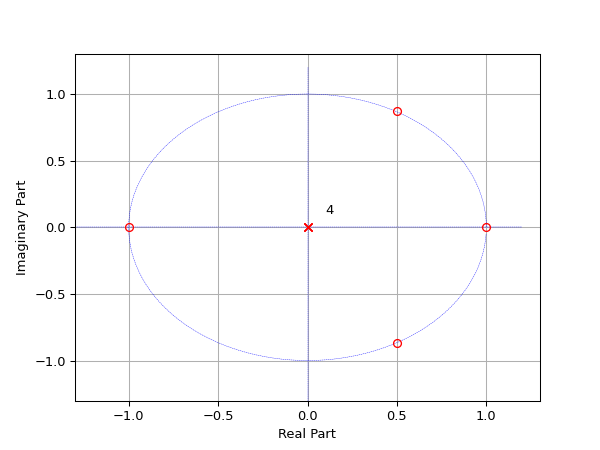

In [110]:
zplane.zplane(hn3,1)

**YORUM:** Birim çembere konan sıfırlar, o frekansı bastıracaktır. Görüyoruzki Type-III filtremizin z=-1  ve z=1  de sıfırları mevcuttur. z=-1 noktası bizim için 𝜋 değerine karşılık gelmektedir. z=-1 de bulunan sıfır genlik cevabında incelediğimizde 𝜋 frekansında bulunan işaretimizi bastıracağını söyleyebiliriz. z=1 de bulunan sıfır ise 0 frekans değerine karşıklık gelecek ve oradakaki işaretimizin bastıracaktır. Bu nedenlerden dolayı ***Type-III filtremiz alçak geçiren, yüksek geçiren ve bant söndüren filtre olarak kullanılamaz.***

### Type-IV Filtremiz
*Filtre derecemiz M tek olmalı dolayısıyla 4 elemanlı bir dürtü tanımlarsak 0-3 aralığında tanımlanacağı için M=3 olur ve derecemiz tek olmuş olur.*

*h[n] işaretimiz anti-simetrik olmalıdır yani M/2=3/2=1.5 noktasını simetri ekseni seçersek karşılıklı örnekler birbirlerinden farklı olmalıdır.*

In [111]:
#Type-IV filtremizin yukarıda belirttiğimiz özelliklere göre tanımlanması
hn4=np.array([1,-1,1,-1])

Hw4=fft(hn4,N)      #İşaretimizin Fourier dönüşümünün alınması
Hw4_gen=abs(Hw4)    #Genlik cevabının bulunması
Hw4_faz=np.unwrap(np.angle(Hw4))   #Faz cevabının bulunması

tau_w4= -np.diff(Hw4_faz)*(N/(2*np.pi))  #Grup gecikmesinin hesaplanması

<IPython.core.display.Javascript object>


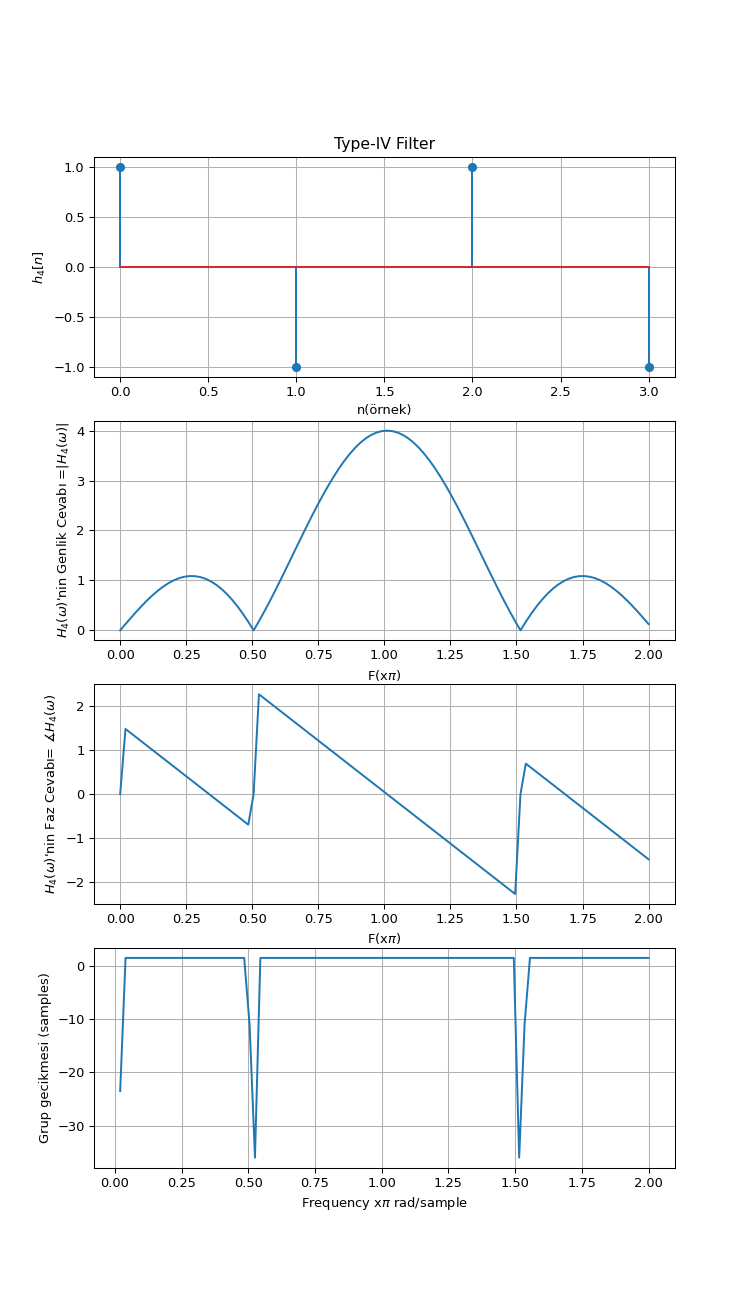

In [112]:
#Type-IV filtremizin çizdirilmesi
plt.figure(figsize=(8,14))

plt.subplot(411)     #Filtremizin zaman domaininde çizdirilmesi
plt.stem(hn4,use_line_collection=True)
plt.title("Type-IV Filter")
plt.xlabel("n(örnek)")
plt.ylabel("$h_4[n]$")
plt.grid()

plt.subplot(412)    #Genlik cevabının çizdirilmesi
plt.plot(w/np.pi,Hw4_gen)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_4$($\omega$)'nin Genlik Cevabı =|$H_4$($\omega$)|")
plt.grid()

plt.subplot(413)    #Faz cevabının çizdirilmesi
plt.plot(w/np.pi,Hw4_faz)
plt.xlabel("F(x$\pi$)")
plt.ylabel("$H_4$($\omega$)'nin Faz Cevabı= $ \measuredangle$$H_4$($\omega$)")
plt.grid()

plt.subplot(414)    #Grup gecikmesi diyagramının çizdirilmesi
plt.plot(w[1::]/np.pi, tau_w4)
plt.ylabel('Grup gecikmesi (samples)')
plt.xlabel('Frequency x$\pi$ rad/sample')
plt.grid()

plt.show()

***Filtrenin genlik cevabına bakarak ne iş yaptığını tahmin edelim:***
**(verilen frekans değerleri genlik cevabındaki şekillerin yerlerini tarif edebilmek için verilmiştir.)**

  *Çizdirdiğimiz genlik cevabında 0-𝜋 aralığında bakarsak bu filtreyi Alçak geçiren bir filtre olarak kullanamayız çünkü alçak frekans değerleri söndürüleceğini görüyoruz . Bu yüzden yüksek geçiren bir filtre olarak kullanılabileceğini söyleyebiliriz.

  *Çizdirdiğimiz genlik cevabında 0.5𝜋 -1.5𝜋 aralında gördüğümüz tepecik sayesinde bu filtrenin Bant geçiren bir filtre olarak kullanabileceğimizi söyleyebilirim.*

  *Type-IV Filtre tipini araştırdığımızda görüyoruz ki **Type-IV filtremiz Alçak geçiren filtre olarak kullanılamıyor** Bunun nedenine filtremizin kutup-sıfır diyagramını incelerken değineceğiz.*
  
  Filtremizin faz cevabından görüldüğü üzere doğrusal bir faza yani lineer bir faza sahip olduğunu söyleyebiliriz. Grup gecikmesi şemamızdan incelediğimizde ise sabit bir grup gecikmesine sahip olduğunu ve grup gecikmemizin 1,5 örnek olduğunu söyleyebiliriz. Bu değer bizim filtremizin simetri ekseninin bulunduğu değer ile aynıdır.*

### Type-IV Filtremizin Kutup-Sıfır diyagramının çizdirilmesi

<IPython.core.display.Javascript object>


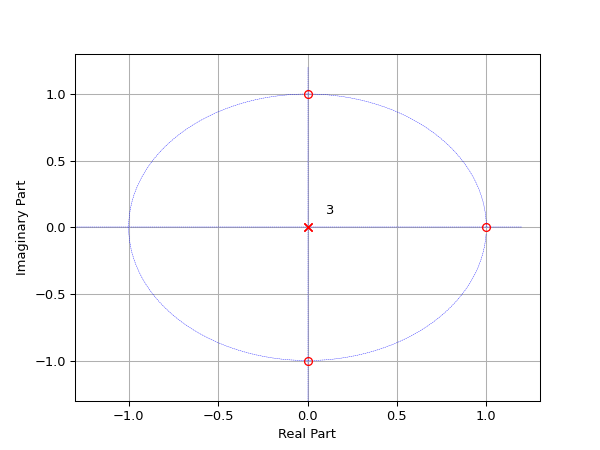

In [113]:
zplane.zplane(hn4,1)

**YORUM:** Type-IV filtremiz 0 frekans değerinde bir 0 a sahip yani bu frekans değerine karşılık gelen noktamız z=1 de sıfır vardır. Dolayısıyla alçak geçiren ve bant söndüren bir filtre olarak kullanılmaya uygun bir filtre olmadığını söyleyebiliriz.

# Soru-2)

*Bu bölümde Pfda ile **FIR** filtreler tasarlanmıştır. Tasarladığım filtreler:*

**Hann Filtresi** alçak geçiren ve bant geçiren olmak üzere iki çeşit hazırlanmıştır. Filtrelerimizin derecesini N=100 olacak şekilde seçtim.

**Flattop Filtresi** alçak geçiren ve bant geçiren olmak üzere iki çeşit hazırlanmıştır. Filtremin derecesini N=100 olacak şekilde seçtim.

## HANN FILTER

In [114]:
import numpy as np                  
import matplotlib.pyplot as plt

from scipy import signal as sgnl  #temel sinyal işleme kütüphanemiz
from scipy.fftpack import fft, ifft

%matplotlib notebook 
#Bu kütüphaneyi oluşturduğumuz .mat formatındaki filtremizi kullanabilmek için çağırıyoruz
from scipy.io import loadmat

*Alçak geçiren Hann filtremizin çağırılması:*

In [115]:
#Filtremizin çağrılması 

filter_data=loadmat("LowpassHannFIR_N_100.mat")     # pyfda de oluşturulan filtremizin çağrılması
Coeffs=filter_data["ba"].astype(np.float)  # b,a katsayılarımızın stringten floata dönüştürülmesi
#b ve a katsayılarımızı oluşturduğumuz filtre içinde görebiliyoruz kaydettiğimizde string formatında oldukları için
#bu kat sayıları float cinsine dönüştürmemiz lazım.

b1=Coeffs[:,0]  #birinci sütun b

N=1000
#Oluşturulan filtremizin genlik ve faz cevaplarının çizdirilmesi

w, Hw1=sgnl.freqz(b1)  

Hw1_gen=abs(Hw1)                  #filtremizin genlik cevabı 
Hw1_faz=np.unwrap(np.angle(Hw1))  #filtremizin faz cevabı


tau_w1= -np.diff(Hw1_faz)*(N/(2*np.pi))

*Bant geçiren Hann filtremizin çağırılması:*

In [116]:
filter_data=loadmat("BandpassHannFIR_N_100.mat")     # pyfda de oluşturulan filtremizin çağrılması
Coeffs=filter_data["ba"].astype(np.float) 

b2=Coeffs[:,0]  


#Oluşturulan filtremizin genlik ve faz cevaplarının çizdirilmesi

w, Hw2=sgnl.freqz(b2)  

Hw2_gen=abs(Hw2)                 
Hw2_faz=np.unwrap(np.angle(Hw2)) 

tau_w2= -np.diff(Hw2_faz)*(N/(2*np.pi))

*Filtrelerimizin Genlik ve Faz cevaplarının çizdirilmesi:*

<IPython.core.display.Javascript object>


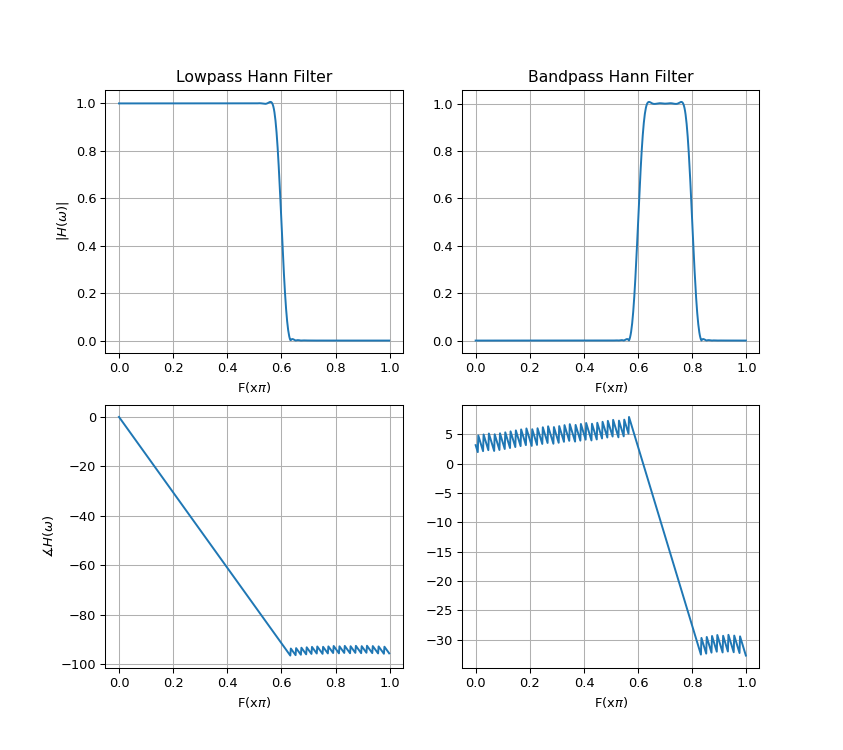

In [117]:

plt.figure(figsize=(9,8))

#filtremizin genlik cevabının çizdirilmesi
plt.subplot(221)
plt.plot(w/np.pi,Hw1_gen)
plt.title("Lowpass Hann Filter")
plt.ylabel("|$H$($\omega$)|")
plt.xlabel("F(x$\pi$)")
plt.grid()

plt.subplot(222)
plt.plot(w/np.pi,Hw2_gen)
plt.title("Bandpass Hann Filter")
plt.xlabel("F(x$\pi$)")
plt.grid()

#filtremizin faz cevabının çizdirilmesi
plt.subplot(223)
plt.plot(w/np.pi,Hw1_faz)
plt.ylabel("$ \measuredangle$$H$($\omega$)")
plt.xlabel("F(x$\pi$)")
plt.grid()

#filtremizin faz cevabının çizdirilmesi
plt.subplot(224)
plt.plot(w/np.pi,Hw2_faz)
plt.xlabel("F(x$\pi$)")
plt.grid()

plt.show()

*Filtrelerimizin Grup gecikmesi fonksiyonlarının çizdirilmesi:*

<IPython.core.display.Javascript object>


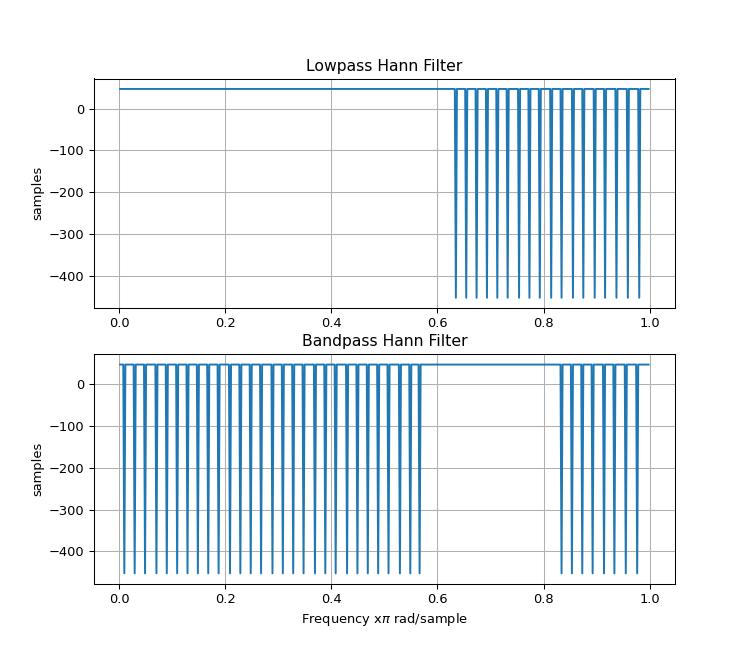

In [118]:
plt.figure(figsize=(8,7))

plt.subplot(211)
plt.plot(w[1::]/np.pi, tau_w1)
plt.ylabel('samples'), 

plt.title("Lowpass Hann Filter")
plt.grid()

plt.subplot(212)
plt.plot(w[1::]/np.pi, tau_w2)
plt.ylabel('samples'), 
plt.xlabel('Frequency x$\pi$ rad/sample')
plt.title("Bandpass Hann Filter")
plt.grid()

***Filtrenin analizi:***

Filtremizi oluştururken örnekleme frekansı cinsinden oluşturduk yani 0-𝜋 aralığını 0-1/2 cinsinden gördük bu yüzden. (F=f/fs=omega/2𝜋). 

***Low-pass Hann filtremiz için:***

Kesim frekansımız 0.3 seçildiği için biz bu değeri genlik cevabımızda 0.6𝜋 ye karşılık geleceğini görmemiz gerekiyor. Genlik 
cevabımız incelendiğinde bu değeri görüyoruz. 0-0.6𝜋 aralığındaki frekans değerlerini geçireceğini bunun dışında kalan değerleri ise söndüreceğini görüyoruz. Genlik kazancımız 1 olduğu için giriş işaretimiz filtrelendikten sonra aynı genlik değerini korunmasını bekliyoruz. Görüldüğü gibi filtremizin genlik değerinde ufak bir dalgalanma mevcut bu filtre tipinin genlik tolerans değerinden kaynaklanmaktadır.

Filtre derecemizi N=100 seçtik bu yüksek bir değerdir bu durum bizim genlik cevabımızı ideale yaklaştırır. N=500 seçseydik kesim frekansında daha yüksek bir keskinliğe sahip olacaktık bu bizi ideal filtreye daha da yaklaştırırdı. Ama bu yüksek derece seçimi bizim zaman uzayında daha fazla gürültü görmemize neden olacaktı çünkü yan lop seviyemizi arttıracaktı. Yan lob kazancı filtre fonksiyonumuza göre değişiklik gösterebilir. Buna 4. sorumuzda çıkış işaretimizi incelerken değineceğiz. Flattop filtremiz ile Hann filtremizi aynı derecede seçmemizin sebebi bu farklılığı görebilmek içindir. Fakat daha az keskinliğe sahip filtrelerimizin seçilmeside kesim frekansımız dışında olan frekans bileşenlerininde çıkış sinyalinde görünmesine sebebiyet verebilir.

Faz cevabından görüldüğü üzere filtremiz doğrusal faz cevabına sahiptir. Geçirme bölgesinde faz cevabımız negarif eğimli rampa fonksiyonu şeklindedir. Bu giriş işaretimizin grup gecikmesinin sabit olacağını nedenselliğin bozulmayacağının göstergesidir. Filtremizin mertebesinin yüksek olması bizim faz gecikmemizide arttıracaktır. 

Grup gecikmesini için: faz cevabının sürekli olduğu araklıklardaki değeri incelediğimizde grup gecikmemizin 5 örnek olacağını görüyoruz.

***Band-pass Hann filtremiz için:***

Kesim frekansımız 0.3-0.4 aralığını geçirecek şekilde seçildiği için biz bu değeri genlik cevabımızda 0.6𝜋-0.8𝜋 aralığına
karşılık geleceğini görmemiz gerekiyor. Genlik cevabımızı incelediğimizde görüyoruzki filtremiz yaklaşık 0.6𝜋-0.8𝜋 aralığındaki frekans bileşenlerini geçirirken diğer değerleri söndürmeye çalışsacaktır. 

Filtre derecemizi N=100 seçtik ve yukarıda low-pass Hann filtremizdeki neden ve sonuç ilişkileri bu filtremiz içinde geçerlidir.

Faz cevabından görüldüğü üzere filtremiz doğrusal faz cevabına sahiptir. Geçirme bölgesinde faz cevabımız negarif eğimli rampa fonksiyonu şeklindedir. Bu giriş işaretimizin grup gecikmesinin sabit olacağını nedenselliğin bozulmayacağının göstergesidir. Filtremizin mertebesinin yüksek olması bizim faz gecikmemizide arttıracaktır. 

Grup gecikmesini için: faz cevabının sürekli olduğu araklıklardaki değeri incelediğimizde grup gecikmemizin 50 örnek olacağını görüyoruz.

## FLATTOP FILTER

*Alçak geçiren flattop filtremizin tanımlanması:*

In [119]:
filter_data=loadmat("LowpassFlattopFIR_N_100.mat")     # pyfda de oluşturulan filtremizin çağrılması
Coeffs=filter_data["ba"].astype(np.float)  # b,a katsayılarımızın stringten floata dönüştürülmesi
#b ve a katsayılarımızı oluşturduğumuz filtre içinde görebiliyoruz kaydettiğimizde string formatında oldukları için
#bu kat sayıları float cinsine dönüştürmemiz lazım.

b3=Coeffs[:,0]  #birinci sütun b
 

#Oluşturulan filtremizin genlik ve faz cevaplarının çizdirilmesi

w, Hw3=sgnl.freqz(b3)  

Hw3_gen=abs(Hw3)                 #filtremizin genlik cevabı
Hw3_faz=np.unwrap(np.angle(Hw3)) #filtremizin faz cevabı

tau_w3= -np.diff(Hw3_faz)*(N/(2*np.pi))


*Bant geçiren Flattop filtremizin tanımlanması:*

In [120]:
filter_data=loadmat("BandpassFlattopFIR_N_100.mat")     # pyfda de oluşturulan filtremizin çağrılması
Coeffs=filter_data["ba"].astype(np.float)  

b4=Coeffs[:,0]  


#Oluşturulan filtremizin genlik ve faz cevaplarının çizdirilmesi

w, Hw4=sgnl.freqz(b4)  

Hw4_gen=abs(Hw4)                 
Hw4_faz=np.unwrap(np.angle(Hw4)) 

tau_w4= -np.diff(Hw4_faz)*(N/(2*np.pi))


*Filtrelerimizin Genlik ve Faz cevaplarının çizdirilmesi:*

<IPython.core.display.Javascript object>


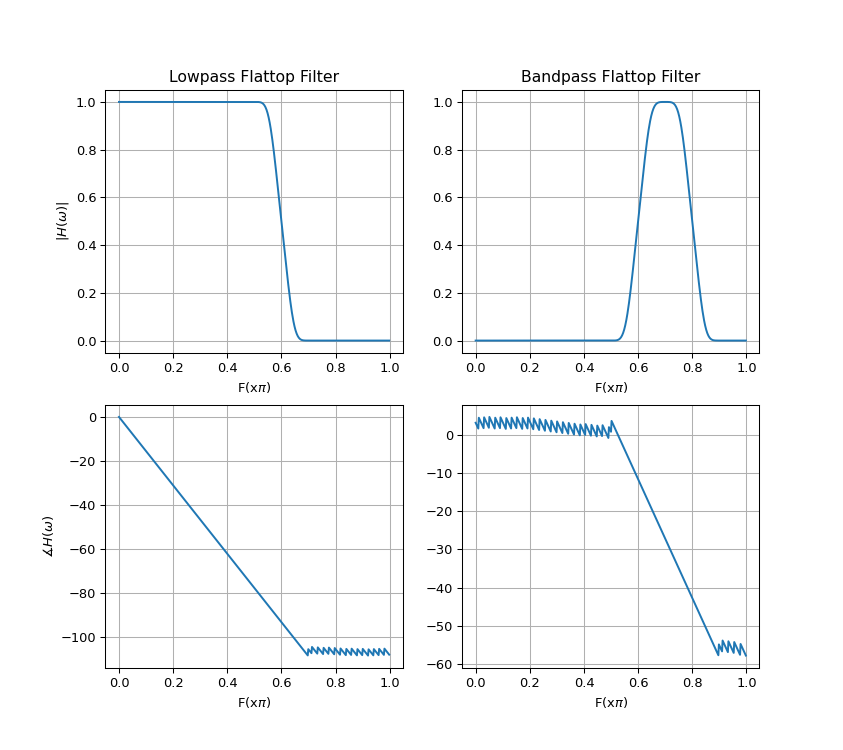

In [121]:
plt.figure(figsize=(9,8))

#filtremizin genlik cevabının çizdirilmesi
plt.subplot(221)
plt.plot(w/np.pi,Hw3_gen)
plt.title("Lowpass Flattop Filter")
plt.ylabel("|$H$($\omega$)|")
plt.xlabel("F(x$\pi$)")
plt.grid()

plt.subplot(222)
plt.plot(w/np.pi,Hw4_gen)
plt.title("Bandpass Flattop Filter")
plt.xlabel("F(x$\pi$)")
plt.grid()

#filtremizin faz cevabının çizdirilmesi
plt.subplot(223)
plt.plot(w/np.pi,Hw3_faz)
plt.ylabel("$ \measuredangle$$H$($\omega$)")
plt.xlabel("F(x$\pi$)")
plt.grid()

#filtremizin faz cevabının çizdirilmesi
plt.subplot(224)
plt.plot(w/np.pi,Hw4_faz)
plt.xlabel("F(x$\pi$)")
plt.grid()

plt.show()

*Filtrelerimizin Grup gecikmesi fonksiyonlarının çizdirilmesi:*

<IPython.core.display.Javascript object>


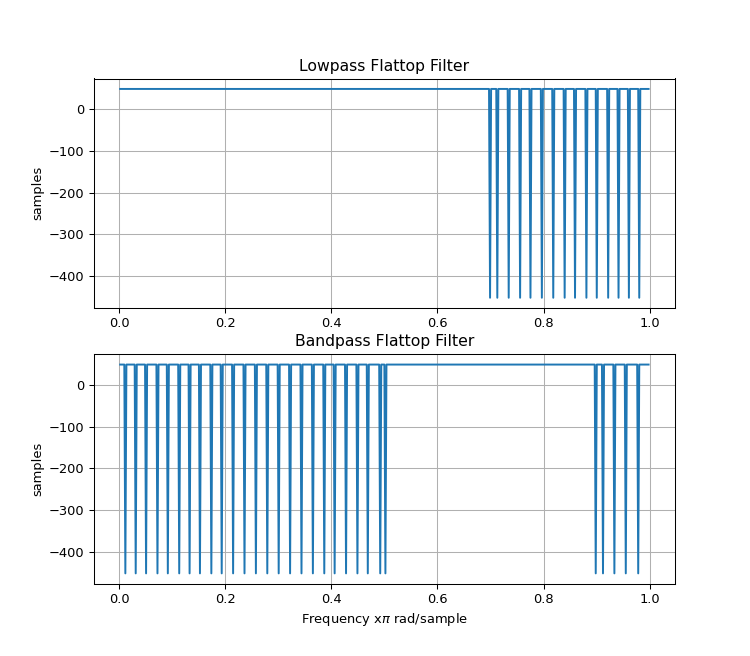

In [122]:
plt.figure(figsize=(8,7))

plt.subplot(211)
plt.plot(w[1::]/np.pi, tau_w3)
plt.title("Lowpass Flattop Filter")
plt.ylabel('samples')
plt.grid()

plt.subplot(212)
plt.plot(w[1::]/np.pi, tau_w4)
plt.title("Bandpass Flattop Filter")
plt.ylabel('samples')
plt.xlabel('Frequency x$\pi$ rad/sample')
plt.grid()
plt.show()

***Filtrenin Analizi:***

Filtremizi oluştururken örnekleme frekansı cinsinden oluşturduk yani 0-𝜋 aralığını 0-1/2 cinsinden gördük bu yüzden. (F=f/fs=omega/2𝜋). 

***Low-pass Flattop filtremiz için:***

Kesim frekansımız 0.3 seçildiği için biz bu değeri genlik cevabımızda 0.6𝜋 ye karşılık geleceğini görmemiz gerekiyor. Genlik 
cevabımız incelendiğinde bu değeri görüyoruz. 0-0.6𝜋 aralığındaki frekans değerlerini geçireceğini bunun dışında kalan değerleri ise söndüreceğini görüyoruz. Genlik kazancımız 1 olduğu için giriş işaretimiz filtrelendikten sonra aynı genlik değerini korunmasını bekliyoruz.

Filtre derecemizi N=100 seçtik bu yüksek bir değerdir bu durum bizim genlik cevabımızı ideale yaklaştırır. N=500 seçseydik kesim frekansında daha yüksek bir keskinliğe sahip olacaktık bu bizi ideal filtreye daha da yaklaştırırdı. Ama bu yüksek derece seçimi bizim zaman uzayında daha fazla gürültü görmemize neden olacaktı çünkü yan lop seviyemizi arttıracaktı. Yan lob kazancı filtre fonksiyonumuza göre değişiklik gösterebilir. Buna 4. sorumuzda çıkış işaretimizi incelerken değineceğiz.
Fakat daha az keskinliğe sahip filtrelerimizin seçilmeside kesim frekansımız dışında olan frekans bileşenlerininde çıkış sinyalinde görünmesine sebebiyet verebilir.

Faz cevabından görüldüğü üzere filtremiz doğrusal faz cevabına sahiptir. Geçirme bölgesinde faz cevabımız negarif eğimli rampa fonksiyonu şeklindedir. Bu giriş işaretimizin grup gecikmesinin sabit olacağını nedenselliğin bozulmayacağının göstergesidir. Filtremizin mertebesinin yüksek olması bizim faz gecikmemizide arttıracaktır. 

Grup gecikmesini için: faz cevabının sürekli olduğu araklıklardaki değeri incelediğimizde grup gecikmemizin 5 örnek olacağını görüyoruz.

***Band-pass Flattop filtremiz için:***

Kesim frekansımız 0.3-0.4 aralığını geçirecek şekilde seçildiği için biz bu değeri genlik cevabımızda 0.6𝜋-0.8𝜋 aralığına
karşılık geleceğini görmemiz gerekiyor. Genlik cevabımızı incelediğimizde görüyoruzki filtremiz yaklaşık 0.6𝜋-0.8𝜋 aralığındaki frekans bileşenlerini geçirirken diğer değerleri söndürmeye çalışsacaktır. Genlik kazancımız 1 olduğu için giriş işaretimiz filtrelendikten sonra aynı genlik değerini korunmasını bekliyoruz.

Filtre derecemizi N=100 seçtik ve yukarıda low-pass flattop filtremizdeki neden ve sonuç ilişkileri bu filtremiz içinde geçerlidir.

Faz cevabından görüldüğü üzere filtremiz doğrusal faz cevabına sahiptir. Geçirme bölgesinde faz cevabımız negarif eğimli rampa fonksiyonu şeklindedir. Bu giriş işaretimizin grup gecikmesinin sabit olacağını nedenselliğin bozulmayacağının göstergesidir. Filtremizin mertebesinin yüksek olması bizim faz gecikmemizide arttıracaktır. 

Grup gecikmesini için: faz cevabının sürekli olduğu araklıklardaki değeri incelediğimizde grup gecikmemizin 50 örnek olacağını görüyoruz.

# Soru-3)

*Bu bölümde Pfda ile **IIR** filtreler tasarlanmıştır. Tasarladığım filtreler:*

**Bessel Filtresi** alçak geçiren ve bant geçiren olmak üzere iki çeşit hazırlanmıştır. Filtrelerimizin derecesini N=15 olacak şekilde seçtim.

**Elliptic Filtresi** alçak geçiren ve bant geçiren olmak üzere iki çeşit hazırlanmıştır. Filtremin derecesini N=15 olacak şekilde seçtim.

## BESSEL FILTER

*Alçak geçiren Bessel filtremizin tanımlanması:*

In [123]:
filter_data=loadmat("LowpassBesselIIR_N_15.mat")     # pyfda de oluşturulan filtremizin çağrılması
Coeffs=filter_data["ba"].astype(np.float)  

b5=Coeffs[:,0]  
a5=Coeffs[:,1]


#Oluşturulan filtremizin genlik ve faz cevaplarının çizdirilmesi

w, Hw5=sgnl.freqz(b5,a5)  

Hw5_gen=abs(Hw5)                 
Hw5_faz=np.unwrap(np.angle(Hw5)) 

tau_w5= -np.diff(Hw5_faz)*(N/(2*np.pi))

*Yüksek geçiren Bessel Filtremizin tanımlanması:*

In [124]:
#Filtremizin çağrılması 

filter_data=loadmat("HighpassBesselIIR_N_15.mat")     # pyfda de oluşturulan filtremizin çağrılması
Coeffs=filter_data["ba"].astype(np.float)             # b,a katsayılarımızın stringten floata dönüştürülmesi
#b ve a katsayılarımızı oluşturduğumuz filtre içinde görebiliyoruz kaydettiğimizde string formatında oldukları için
#bu kat sayıları float cinsine dönüştürmemiz lazım.

b6=Coeffs[:,0]  #birinci sütun b
a6=Coeffs[:,1]  #ikinci sütun a 

#Oluşturulan filtremizin genlik ve faz cevaplarının çizdirilmesi

w, Hw6=sgnl.freqz(b6,a6)  

Hw6_gen=abs(Hw6)                 #filtremizin genlik cevabı
Hw6_faz=np.unwrap(np.angle(Hw6)) #filtremizin faz cevabı

tau_w6= -np.diff(Hw6_faz)*(N/(2*np.pi))


*Filtrelerimizin Genlik ve Faz cevaplarının çizdirilmesi:*

<IPython.core.display.Javascript object>


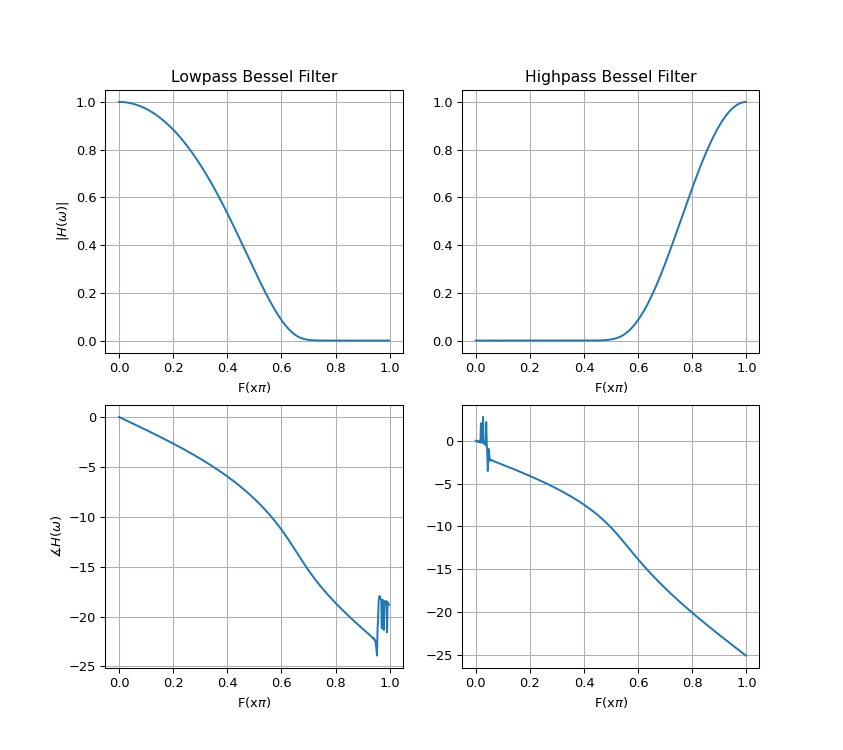

In [125]:
plt.figure(figsize=(9,8))

#filtremizin genlik cevabının çizdirilmesi
plt.subplot(221)
plt.plot(w/np.pi,Hw5_gen)
plt.title("Lowpass Bessel Filter")
plt.ylabel("|$H$($\omega$)|")
plt.xlabel("F(x$\pi$)")
plt.grid()

plt.subplot(222)
plt.plot(w/np.pi,Hw6_gen)
plt.title("Highpass Bessel Filter")
plt.xlabel("F(x$\pi$)")
plt.grid()

#filtremizin faz cevabının çizdirilmesi
plt.subplot(223)
plt.plot(w/np.pi,Hw5_faz)
plt.ylabel("$ \measuredangle$$H$($\omega$)")
plt.xlabel("F(x$\pi$)")
plt.grid()

#filtremizin faz cevabının çizdirilmesi
plt.subplot(224)
plt.plot(w/np.pi,Hw6_faz)
plt.xlabel("F(x$\pi$)")
plt.grid()

plt.show()

*Filtrelerimizin Grup gecikmesi fonksiyonlarının çizdirilmesi:*

<IPython.core.display.Javascript object>


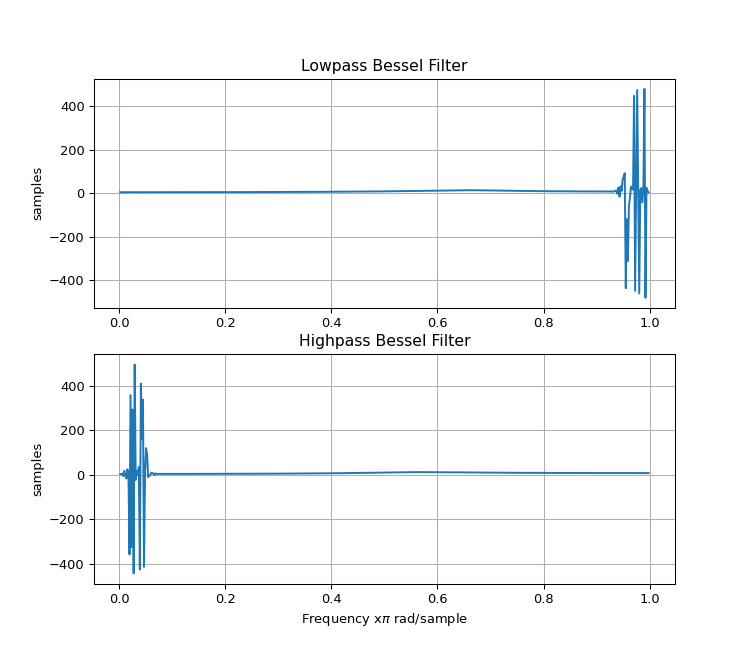

In [126]:
plt.figure(figsize=(8,7))

plt.subplot(211)
plt.plot(w[1::]/np.pi, tau_w5)
plt.ylabel('samples'), 
plt.title("Lowpass Bessel Filter")
plt.grid()

plt.subplot(212)
plt.plot(w[1::]/np.pi, tau_w6)
plt.ylabel('samples'), 
plt.xlabel('Frequency x$\pi$ rad/sample')
plt.title("Highpass Bessel Filter")
plt.grid()

plt.show()

***Filtrenin Analizi:***

Filtremizi oluştururken örnekleme frekansı cinsinden oluşturduk bu yüzden 0-𝜋 aralığını 0-1/2 cinsinden gördük . (F=f/fs=omega/2𝜋). 

***Low-pass Bessel filtremiz için:***

Kesim frekansımız 0.3 seçildiği için biz bu değeri genlik cevabımızda 0.6𝜋 ye karşılık geleceğini görmemiz gerekiyor. Genlik 
cevabımız incelendiğinde bu değeri görüyoruz. 0-0.6𝜋 aralığındaki frekans değerlerini geçireceğini bunun dışında kalan değerleri ise söndüreceğini görüyoruz. Genlik değerimizi  0-0.6𝜋 aralığına kadar olan kısımı incelediğimizde kesim frekansımıza gelindiğinde genlik değerimiz birden dik bir şekilde düşüş yaşamamıştır. İdeal filtre gibi değildir. Parabolik bir düşüş yaşadığı için giriş işaretimiz filtrelendikten sonra aynı genlik değerininden düşük bir şekilde çıkmış olacağını bekleriz.

Filtre derecemizi N=15 bu yüzden kesim frekansında düşük bir keskinliğe sahip olacaktır. Fakat bu durum soru-2 de tanımladığımız FIR filtrelere göre daha az gürültü görmemize sağlayacaktır çünkü düşük filtre derecesi seçmek yan lop seviyemizi azaltacak bir etki yapmaktadır. Yan lob seviyemizin azaltılması lob kazancımızı arttıracaktır. Yan lob kazancı filtre fonksiyonumuza göre değişiklik gösterebilir. Buna 4. sorumuzda çıkış işaretimizi incelerken değineceğiz. Fakat bu filtremiz soru-2 de tanımladığımız filtrelere göre kesim frekansında daha az keskinliğe sahiptirler, bu durum kesim frekansımız dışında olan frekans bileşenlerininde çıkış sinyalinde görünmesine sebebiyet verecektir.

Faz cevabından görüldüğü üzere filtremiz doğrusal faz cevabına sahip değildir. Bu yüzden giriş işaretimizin grup gecikmesinin sabit olmadığını, her frekans değerlerinde farklılık gösterebileceğini söyleyebiliriz. Fakat filtremizin derecesi düşük olduğu için bu durum faz gecikmemizi azaltacak yöndedir. 

Grup gecikmesini için: Doğrusal bir grup gecikmesine sahip değiliz ama bazı frekans azalıkları için grup gecikmesi çok az değişiklik gösteriyor. Grup gecikmesinin o aralıklarda az olmasının sebebi filtre derecimizin düşük bir değer seçilmesinden kaynaklanmasındandır.

***High-pass Flattop filtremiz için:***

Kesim frekansımız 0.3 seçildiği için biz bu değeri genlik cevabımızda 0.6𝜋 ye karşılık geleceğini görmemiz gerekiyor. Genlik 
cevabımız incelendiğinde bu değeri görüyoruz. 0.6𝜋-𝜋 aralığındaki frekans değerlerini geçireceğini bunun dışında kalan değerleri ise söndüreceğini görüyoruz. 

Genlik değerimizi 0.6𝜋-𝜋 aralığına kadar olan kısımı incelediğimizde kesim frekansımıza gelindiğinde genlik değerimiz birden dik bir şekilde düşüş yaşamamıştır. İdeal filtre gibi değildir. Parabolik bir düşüş yaşadığı için giriş işaretimiz filtrelendikten sonra aynı genlik değerininden düşük bir şekilde çıkmış olacağını bekleriz. Filtre derecemizin (N=15) düşük seçilmesi (Fır filtrelere göre) genlik cevabını idealden uzaklaştırır.

Faz cevabından görüldüğü üzere filtremiz doğrusal faz cevabına sahip değildir. Bu yüzden giriş işaretimizin grup gecikmesinin sabit olmadığını, her frekans değerlerinde farklılık gösterebileceğini söyleyebiliriz. Fakat filtremizin derecesi düşük olduğu için bu durum faz gecikmemizi azaltacak yöndedir. 

Grup gecikmesini için: Doğrusal bir grup gecikmesine sahip değiliz ama bazı frekans azalıkları için grup gecikmesi çok az değişiklik gösteriyor. Grup gecikmesinin o aralıklarda az olmasının sebebi filtre derecimizin düşük bir değer seçilmesinden kaynaklanmasındandır.

## ELLIPTIC FILTER

*Alçak geçiren Elliptic filtremizin tanımlanması:*

In [127]:
filter_data=loadmat("LowpassEllipticIIR_N_15.mat")     # pyfda de oluşturulan filtremizin çağrılması
Coeffs=filter_data["ba"].astype(np.float)  

b7=Coeffs[:,0]  
a7=Coeffs[:,1]  

#Oluşturulan filtremizin genlik ve faz cevaplarının çizdirilmesi
w, Hw7=sgnl.freqz(b7,a7)  

Hw7_gen=abs(Hw7)                
Hw7_faz=np.unwrap(np.angle(Hw7)) 

tau_w7= -np.diff(Hw7_faz)*(N/(2*np.pi))


*Yüksek geçiren Elliptic filtremizin tanımlanması:*

In [128]:
filter_data=loadmat("HighpassEllipticIIR_N_15.mat")     # pyfda de oluşturulan filtremizin çağrılması
Coeffs=filter_data["ba"].astype(np.float)               # b,a katsayılarımızın stringten floata dönüştürülmesi
#b ve a katsayılarımızı oluşturduğumuz filtre içinde görebiliyoruz kaydettiğimizde string formatında oldukları için
#bu kat sayıları float cinsine dönüştürmemiz lazım.

b8=Coeffs[:,0]  #birinci sütun b
a8=Coeffs[:,1]  #ikinci sütun a 

#Oluşturulan filtremizin genlik ve faz cevaplarının çizdirilmesi

w, Hw8=sgnl.freqz(b8,a8)  

Hw8_gen=abs(Hw8)                 #filtremizin genlik cevabı
Hw8_faz=np.unwrap(np.angle(Hw8)) #filtremizin faz cevabı

tau_w8= -np.diff(Hw8_faz)*(N/(2*np.pi))


*Filrelerimizin Genlik ve Faz cevaplarının çizdirilmesi:*

<IPython.core.display.Javascript object>


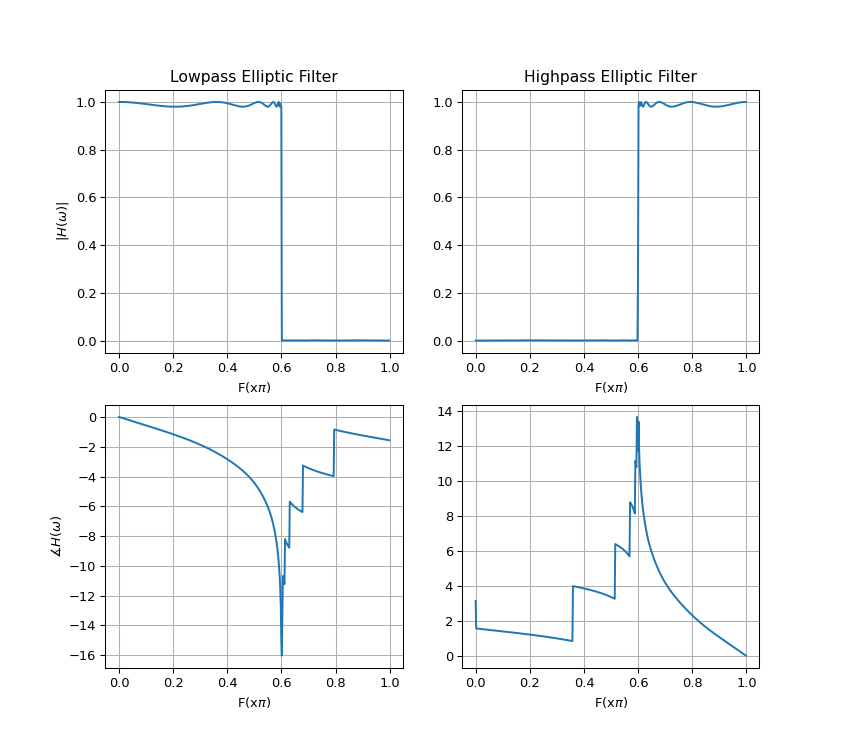

In [129]:
plt.figure(figsize=(9,8))

#filtremizin genlik cevabının çizdirilmesi
plt.subplot(221)
plt.plot(w/np.pi,Hw7_gen)
plt.title("Lowpass Elliptic Filter")
plt.ylabel("|$H$($\omega$)|")
plt.xlabel("F(x$\pi$)")
plt.grid()

plt.subplot(222)
plt.plot(w/np.pi,Hw8_gen)
plt.title("Highpass Elliptic Filter")
plt.xlabel("F(x$\pi$)")
plt.grid()

#filtremizin faz cevabının çizdirilmesi
plt.subplot(223)
plt.plot(w/np.pi,Hw7_faz)
plt.ylabel("$ \measuredangle$$H$($\omega$)")
plt.xlabel("F(x$\pi$)")
plt.grid()

#filtremizin faz cevabının çizdirilmesi
plt.subplot(224)
plt.plot(w/np.pi,Hw8_faz)
plt.xlabel("F(x$\pi$)")
plt.grid()

plt.show()

*Filtrelerimizin Grup gecikmesi fonksiyonlarının çizdirilmesi:*

<IPython.core.display.Javascript object>


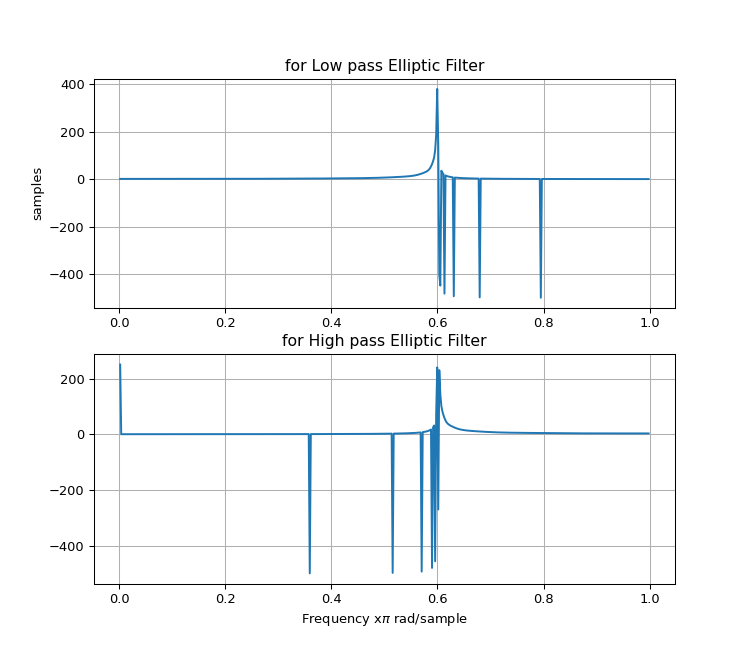

In [130]:
plt.figure(figsize=(8,7))

plt.subplot(211)
plt.plot(w[1::]/np.pi, tau_w7)
plt.ylabel('samples')
plt.title("for Low pass Elliptic Filter")
plt.grid()

plt.subplot(212)
plt.plot(w[1::]/np.pi, tau_w8) 
plt.title("for High pass Elliptic Filter")
plt.xlabel('Frequency x$\pi$ rad/sample')
plt.grid()

***Filtrenin Analizi:***

Filtremizi oluştururken örnekleme frekansı cinsinden oluşturduk bu yüzden 0-𝜋 aralığını 0-1/2 cinsinden gördük . (F=f/fs=omega/2𝜋). 

***Low-pass Elliptic filtremiz için:***

Kesim frekansımız 0.3 seçildiği için biz bu değeri genlik cevabımızda 0.6𝜋 ye karşılık geleceğini görmemiz gerekiyor. Genlik 
cevabımız incelendiğinde bu değeri görüyoruz. 0-0.6𝜋 aralığındaki frekans değerlerini geçireceğini bunun dışında kalan değerleri ise söndüreceğini görüyoruz. Genlik değerimizi  0-0.6𝜋 aralığına kadar olan kısımı incelediğimizde kesim frekansımıza gelindiğinde genlik değerimiz birden dik bir şekilde düşüş yaşanmıştır. Soru-2 de oluşturduğumuz Fır filtrelere benzerlik göstermektedir fakat önemli ayrıntı filtre derecemiz N=15 seçilmiştir. Daha düşük filtre derecesinde yüksek kesim performansı sağlanmıştır. Genlik kazancımız=1 olarak belirlenmiştir toleransı göz önünde bulundurmazsak giriş işaretimize bu filtre uygulandığında çıkışta genlik değerleri çok bir değişiklik göstermemelidir.

Filtre derecemizi N=15 olmasına rağmen kesim frekansında yüksek bir keskinlik vardır.Fakat bu durum Yukarıda tanımladığımız Bessel filtremize göre daha fazla gürültü görmemize neden olacaktır. DÜşük filtre desecesi seçmemize rağmen gürültü seviyemiz yüksektir.

Faz cevabından görüldüğü üzere filtremiz doğrusal faz cevabına sahip değildir. Bu yüzden giriş işaretimizin grup gecikmesinin sabit olmadığını, her frekans değerlerinde farklılık gösterebileceğini söyleyebiliriz. Fakat filtremizin derecesi düşük olduğu için bu durum faz gecikmemizi azaltacak yöndedir. 

Grup gecikmesini için: Doğrusal bir grup gecikmesine sahip değiliz ama bazı frekans azalıkları için grup gecikmesi çok az değişiklik gösteriyor. Grup gecikmesinin o aralıklarda az olmasının sebebi filtre derecimizin düşük bir değer seçilmesinden kaynaklanmasındandır.

***High-pass Elliptic filtremiz için:***

Kesim frekansımız 0.3 seçildiği için biz bu değeri genlik cevabımızda 0.6𝜋 ye karşılık geleceğini görmemiz gerekiyor. Genlik 
cevabımız incelendiğinde bu değeri görüyoruz. 0.6𝜋-𝜋 aralığındaki frekans değerlerini geçireceğini bunun dışında kalan değerleri ise söndüreceğini görüyoruz. 

Genlik değerimizi 0.6𝜋-𝜋 aralığına kadar olan kısımı incelediğimizde kesim frekansımıza gelindiğinde genlik değerimiz birden dik bir şekilde düşüş yaşanmıştır. Bu yukarıda belirttiğim nedenler ve sonuçlar doğurmaktadır.

Faz cevabından görüldüğü üzere filtremiz doğrusal faz cevabına sahip değildir. Bu yüzden giriş işaretimizin grup gecikmesinin sabit olmadığını, her frekans değerlerinde farklılık gösterebileceğini söyleyebiliriz. Fakat filtremizin derecesi düşük olduğu için bu durum faz gecikmemizi azaltacak yöndedir. 

Grup gecikmesini için: Doğrusal bir grup gecikmesine sahip değiliz ama bazı frekans azalıkları için grup gecikmesi çok az değişiklik göster. Grup gecikmesinin o aralıklarda az olmasının sebebi filtre derecimizin düşük bir değer seçilmesinden kaynaklanmaktadır.

# Soru-4)

In [131]:
N=400   # 400 örneklik dizi oluşturuyoruz
M=60    # pencere boyutumuz tanımlandı

n=np.arange(0,M+1,1)    #zaman vektörümüzü tanımladık
wn=0.54-0.46*np.cos(2*np.pi*n/M)  #hamming penceresini tanımladık

#frekans bileşenlerimizin pecereleme işlemi yapılarak tanımlanması
x_1=wn*np.cos(0.2*np.pi*n)        
x_2=wn*np.cos(0.4*np.pi*n-np.pi/2)
x_3=wn*np.cos(0.8*np.pi*n+np.pi/5)

#soruda verilen e frekans bileşeninden oluşan x[n] işaretimizin oluşturulması
x_n=np.concatenate((x_3,x_1,x_2, np.zeros(N-3*len(n))), axis=None)

#np.concatenate() komutumuz tanımladığımız işaretleri belirli bir eksen üzerinde birleştirmeye yarıyor. 

<IPython.core.display.Javascript object>


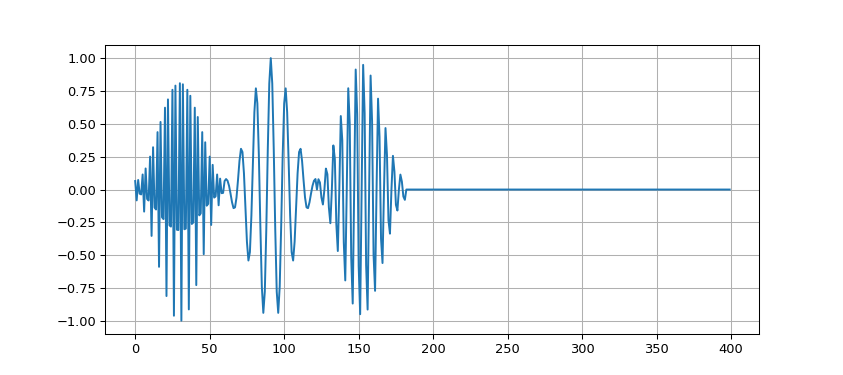

In [132]:
#x[n] işaretimizin çizdirilmesi

plt.figure(figsize=(9,4))
plt.plot(x_n)
plt.grid()
plt.show()

***x[n] giriş işaretimize filtrelerin uygulanması ile elde edilen çıkış işaretlerimizin oluşturulması***

In [133]:
yn1=sgnl.lfilter(b1,1,x_n) #Lowpass Hann Filtresi
yn2=sgnl.lfilter(b2,1,x_n) #Bandpass Hann Filtresi

yn3=sgnl.lfilter(b3,1,x_n) #Lowpass Flattop Filtresi
yn4=sgnl.lfilter(b4,1,x_n) #Bandpass Flattop Filtresi

yn5=sgnl.lfilter(b5,a5,x_n) #Lowpass Bessel Filtresi
yn6=sgnl.lfilter(b6,a6,x_n) #Highpass Bessel Filtresi

yn7=sgnl.lfilter(b7,a7,x_n) #Lowpass Elliptic Filtresi
yn8=sgnl.lfilter(b8,a8,x_n) #Highpass Elliptic Filtresi

***Oluşturduğumuz Filtrelerimizin giriş işareti x[n]  üzerinde ne etkiler oluşturmasını bekliyoruz:***

## FIR filtrelerimiz:

***Low-pass Hann Filtresi:***

    0 ve 0.6𝜋 arasındaki frekansları geçirecek bir filtre dolayısıyla 0.8𝜋 frekans değerine sahip x_3[n] işaretimizi söndürmesi gerekiyor. Filtre derecesi yüksek seçildiği için çıkış işaretimizde gürültü meydana gelmeli. Genlik değeri giriş işaretimizin genlik değerine yaklaşık bir değer bulunmalı yaklaşık değer bulunmasının sebebi filtrmizin genlik toleransından kaynaklanmakta. Grup gecikmesi 50 örnek olacak şekilde çıkışımızı elde etmeliyiz.
    
***Band-pass Hann Filtresi:***
    
    0.6𝜋 ve 0.8𝜋 arasındaki frekans değerlerini geçirecek bir filtre dolayısıyla 0.2𝜋 frekans değerine sahip x_1[n] ve 0.4𝜋 frekans değerine sahip x_2[n] işaretlerimizin söndürülmesi beklenmektedir. Filtre derecesi büyük seçildiği için çıkış işaretimizde gürültü meydana gelmeli. Genlik değeri giriş işaretimizin genlik değerine yaklaşık bir değer bulunmalı yaklaşık değer bulunmasının sebebi filtrmizin genlik toleransından kaynaklanmakta. Grup gecikmesi 50 örnek olacak şekilde çıkışımızı elde etmeliyiz.

<IPython.core.display.Javascript object>


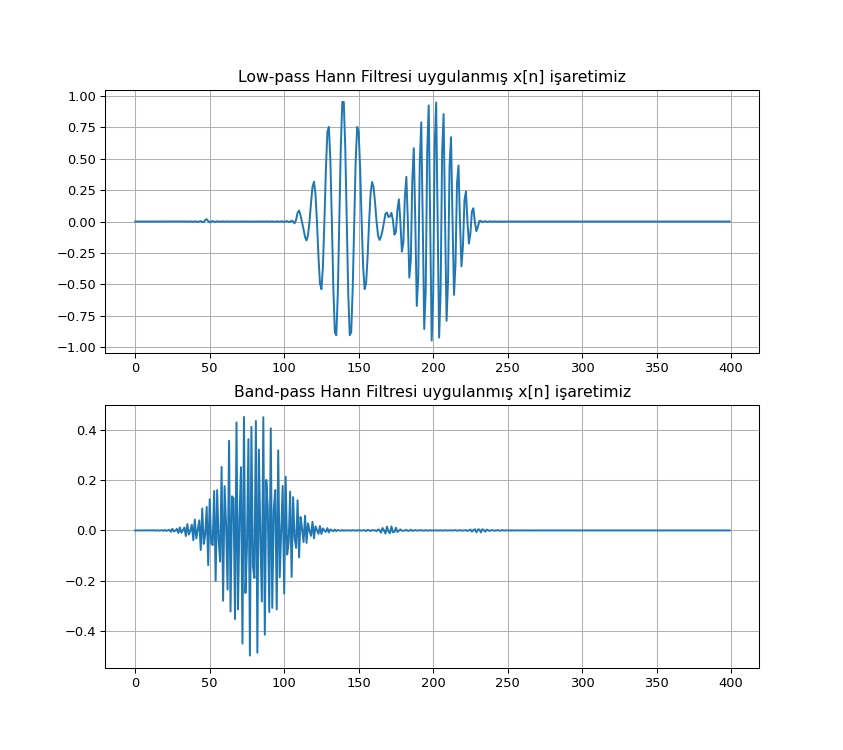

In [134]:
#çıkış işaretlerimizin çizdirilmesi

plt.figure(figsize=(9,8))

plt.subplot(211)
plt.plot(yn1)
plt.title("Low-pass Hann Filtresi uygulanmış x[n] işaretimiz")
plt.grid()

plt.subplot(212)
plt.plot(yn2)
plt.title("Band-pass Hann Filtresi uygulanmış x[n] işaretimiz")
plt.grid()

plt.show()

***Low-pass Flattop Filtresi:***

    0 ve 0.6𝜋 arasındaki frekansları geçirecek bir filtre dolayısıyla 0.8𝜋 frekans değerine sahip x_3[n] işaretimizi söndürmesi gerekiyor. Filtre derecesi yüksek seçildiği için çıkış işaretimizde gürültü meydana gelmeli. Genlik değeri giriş işaretimizin genlik değerine yaklaşık bir değer bulunmalı yaklaşık değer bulunmasının sebebi filtrmizin genlik toleransından kaynaklanmakta. Grup gecikmesi 50 örnek olacak şekilde çıkışımızı elde etmeliyiz.

***Band-pass Flattop Filtresi:***
    
    0.6𝜋 ve 0.8𝜋 arasındaki frekans değerlerini geçirecek bir filtre dolayısıyla 0.2𝜋 frekans değerine sahip x_1[n] ve 0.4𝜋 frekans değerine sahip x_2[n] işaretlerimizin söndürülmesi beklenmektedir. Filtre derecesi büyük seçildiği için çıkış işaretimizde gürültü meydana gelmeli. Genlik değeri giriş işaretimizin genlik değerine yaklaşık bir değer bulunmalı yaklaşık değer bulunmasının sebebi filtrmizin genlik toleransından kaynaklanmakta. Grup gecikmesi 50 örnek olacak şekilde çıkışımızı elde etmeliyiz.

<IPython.core.display.Javascript object>


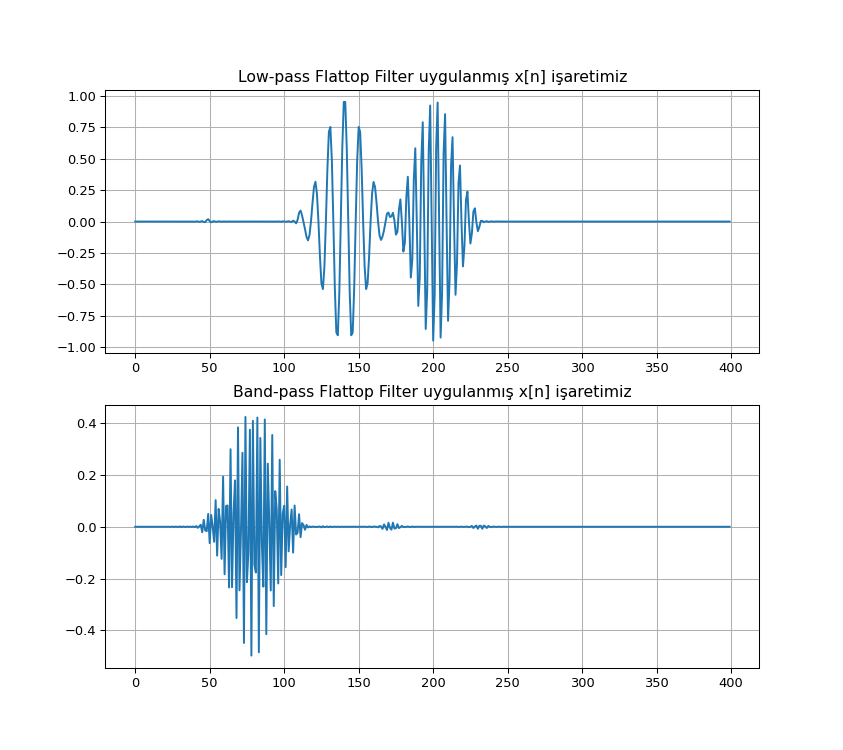

In [135]:
plt.figure(figsize=(9,8))

plt.subplot(211)
plt.plot(yn3)
plt.title("Low-pass Flattop Filter uygulanmış x[n] işaretimiz")
plt.grid()

plt.subplot(212)
plt.plot(yn4)
plt.title("Band-pass Flattop Filter uygulanmış x[n] işaretimiz")
plt.grid()

plt.show()

## IIR filtrelerimiz:
***Low-pass Bessel Filtresi:***

    0 ve 0.6𝜋 arasındaki frekansları geçirecek bir filtre dolayısıyla 0.8𝜋 frekans değerine sahip x_3[n] işaretimizi söndürmesi gerekiyor. Filtre derecesi düşük seçildiği için çıkış işaretimizde gürültü Yukarıda incelediğimiz FIR filtrelerine göre çok daha az olmalıdır. Genlik değeri giriş işaretimizin genlik değerinden biraz düşük bulunmalıdır bunun sebebi filremizin keskin bir kesim bölgesine sahip olmamasından kaynaklanmaktadır. İdeal filtre gibi köşeli bir yapı yerine daha oval bir iniş gözlemleniyor. Bu durum kesim frekansı dışında olan sinyallerinde çıktımızda gözükmesine neden olabilir. Grup gecikmesini incelersek x[n] sinyalimizi oluşturan frekans bileşenlerine baktığımızda grup gecikmelerinin neredeyse 0 olduğunu görürüz bu yüzden bir grup gecikmesi söz konusu olmamalıdır.

***High-pass Bessel Filtresi:***

    0.6𝜋 ve 𝜋 arasındaki frekans değerlerini geçirecek bir filtre dolayısıyla çıktı sinyalimizde sadece 0.8𝜋 frekans değerine sahip x_3[n] işaretini görmemiz gerekiyor. x_2[n] ve x_1[n] işaretlerinin söndürülmesi beklenir.Filtre derecesi düşük seçildiği için çıkış işaretimizde gürültü yukarıda incelediğimiz FIR filtrelerine göre çok daha az olmalıdır. Genlik değeri giriş işaretimizin genlik değerinden biraz düşük bulunmalıdır bunun sebebi filremizin keskin bir kesim bölgesine sahip olmamasından kaynaklanmaktadır. İdeal filtre gibi köşeli bir yapı yerine daha oval bir iniş gözlemleniyor. Bu durum kesim frekansı dışında olan sinyallerinde çıktımızda gözükmesine neden olabilir. Grup gecikmesini incelersek x[n] sinyalimizi oluşturan frekans bileşenlerine baktığımızda grup gecikmelerinin neredeyse 0 olduğunu görürüz bu yüzden bir grup gecikmesi söz konusu olmamalıdır.


<IPython.core.display.Javascript object>


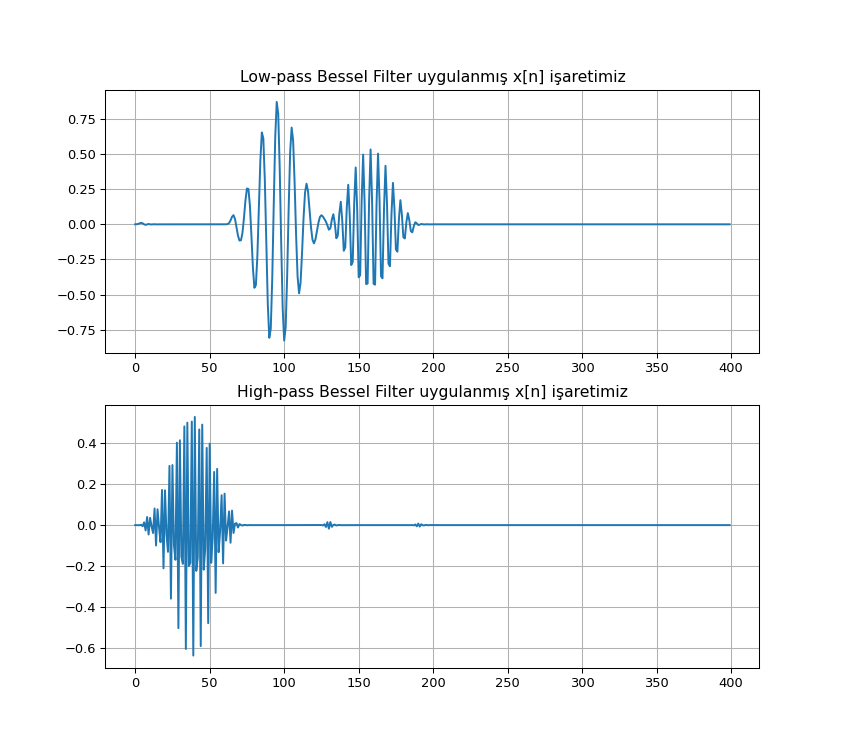

In [136]:
plt.figure(figsize=(9,8))

plt.subplot(211)
plt.plot(yn5)
plt.title("Low-pass Bessel Filter uygulanmış x[n] işaretimiz")
plt.grid()

plt.subplot(212)
plt.plot(yn6)
plt.title("High-pass Bessel Filter uygulanmış x[n] işaretimiz")
plt.grid()

plt.show()

***Low-pass Elliptic Filtresi:***
   
    0 ve 0.6𝜋 arasındaki frekansları geçirecek bir filtre dolayısıyla 0.8𝜋 frekans değerine sahip x_3[n] işaretimizi söndürmesi gerekiyor. Filtre derecesi Yukarıda oluşturduğumuz Bessel filtresi ile aynı (N=15) seçilmesine rağmen keskin bir kesim bölgesine sahiptir (FIR filtreler gibi). Bu yüzden gürültülü bir çıktı elde edilmesi gerekmektedir. Genlik değeri giriş işaretimizin genlik değerine yakın bulunmalıdır. Bunun sebebi filremizin keskin bir kesim bölgesine sahip olmasından kaynaklanmaktadır. Grup gecikmesini incelersek x[n] sinyalimizi oluşturan frekans bileşenlerine baktığımızda grup gecikmelerinin neredeyse 0 olduğunu görürüz bu yüzden bir grup gecikmesi söz konusu olmamalıdır.

***High-pass Elliptic Filtresi:***

      0.6𝜋 ve 𝜋 arasındaki frekans değerlerini geçirecek bir filtre dolayısıyla çıktı sinyalimizde sadece 0.8𝜋 frekans değerine sahip x_3[n] işaretini görmemiz gerekiyor. x_2[n] ve x_1[n] işaretlerinin söndürülmesi beklenir. Filtre derecesi Yukarıda oluşturduğumuz Bessel filtresi ile aynı (N=15) seçilmesine rağmen keskin bir kesim bölgesine sahiptir (FIR filtreler gibi). Bu yüzden gürültülü bir çıktı elde edilmesi gerekmektedir. Genlik değeri giriş işaretimizin genlik değerine yakın bulunmalıdır. Bunun sebebi filremizin keskin bir kesim bölgesine sahip olmasından kaynaklanmaktadır. Grup gecikmesini incelersek x[n] sinyalimizi oluşturan frekans bileşenlerine baktığımızda grup gecikmelerinin neredeyse 0 olduğunu görürüz bu yüzden bir grup gecikmesi söz konusu olmamalıdır.

<IPython.core.display.Javascript object>


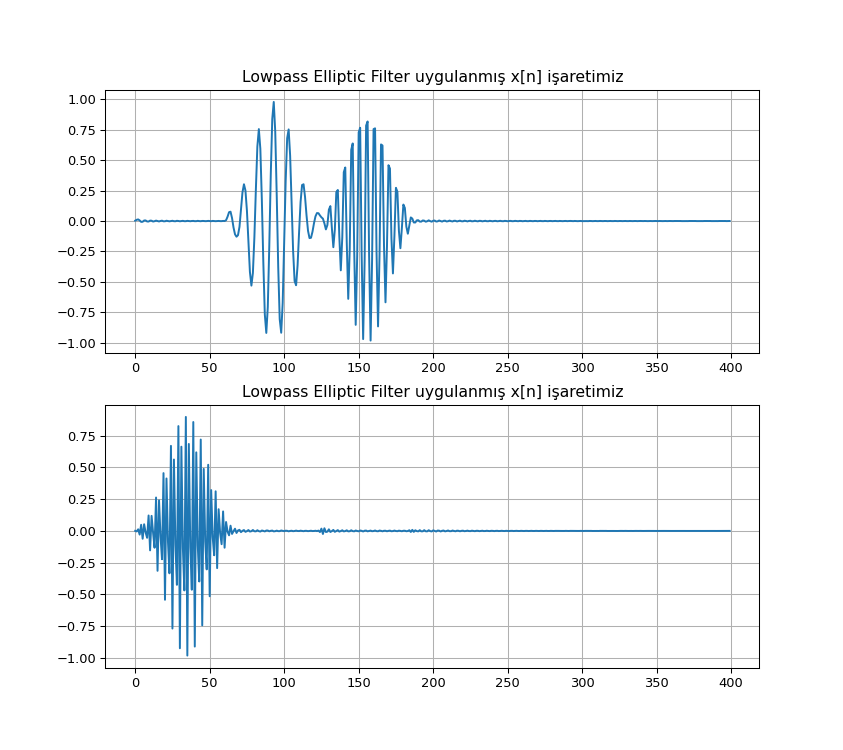

In [137]:
plt.figure(figsize=(9,8))

plt.subplot(211)
plt.plot(yn7)
plt.title("Lowpass Elliptic Filter uygulanmış x[n] işaretimiz")
plt.grid()

plt.subplot(212)
plt.plot(yn8)
plt.title("Lowpass Elliptic Filter uygulanmış x[n] işaretimiz")
plt.grid()

plt.show()

## SONUÇ:

***Filtrelenmiş giriş işaretlerimizi toplu bir şekilde çizdirerek sonuç yorumlarımızı yapalım***

<IPython.core.display.Javascript object>


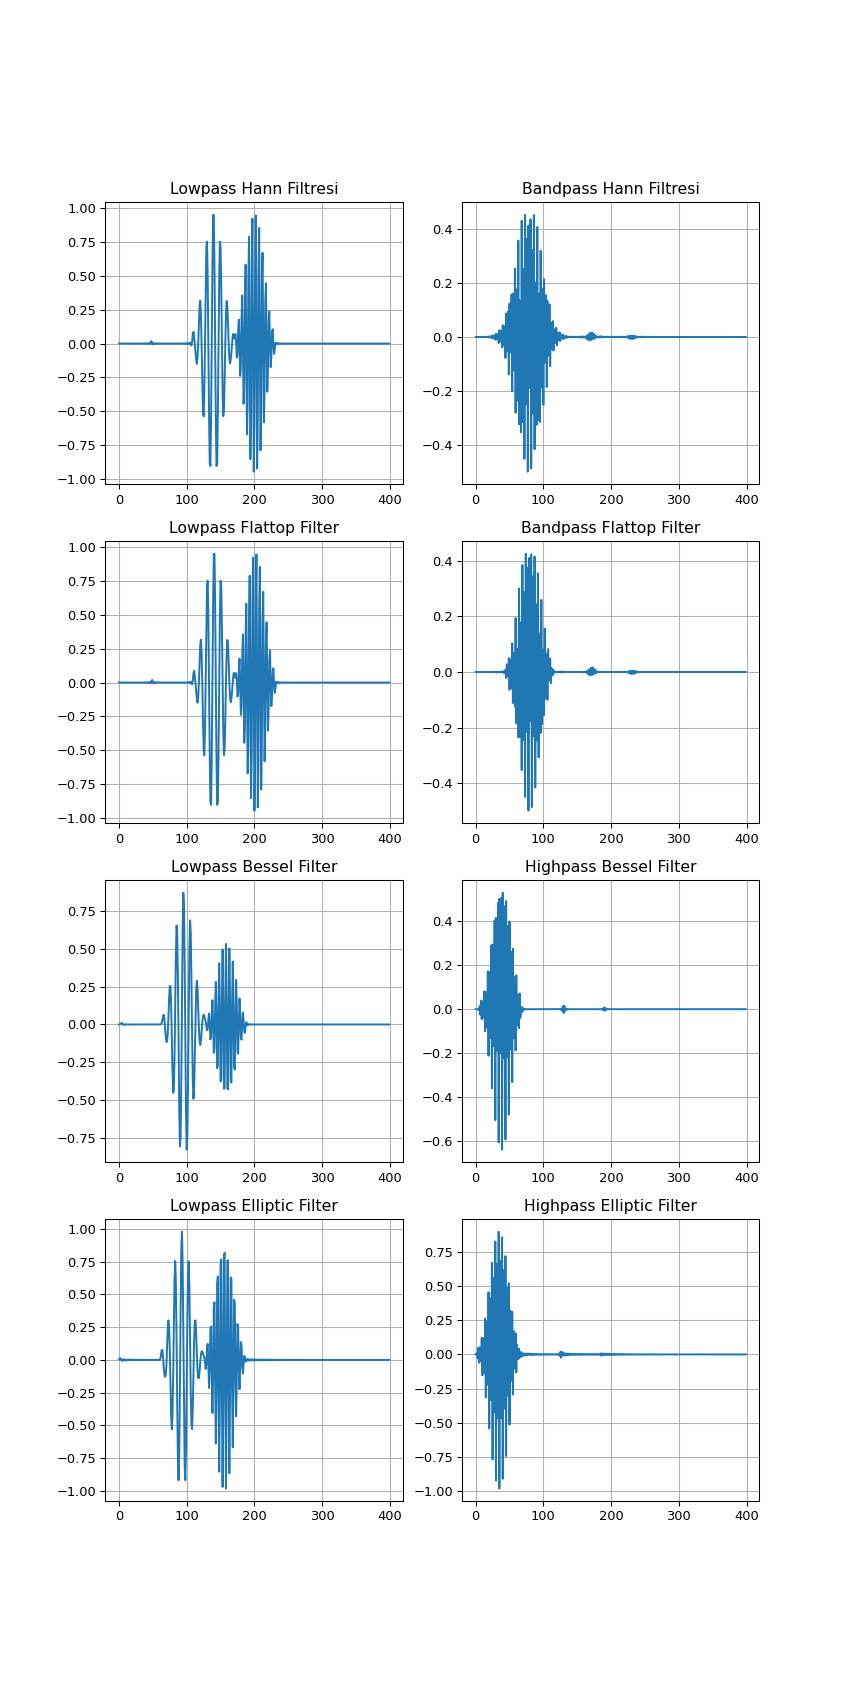

In [138]:
plt.figure(figsize=(9,18))

plt.subplot(421)
plt.plot(yn1)
plt.title("Lowpass Hann Filtresi")
plt.grid()

plt.subplot(422)
plt.plot(yn2)
plt.title("Bandpass Hann Filtresi")
plt.grid()

plt.subplot(423)
plt.plot(yn3)
plt.title("Lowpass Flattop Filter")
plt.grid()

plt.subplot(424)
plt.plot(yn4)
plt.title("Bandpass Flattop Filter")
plt.grid()

plt.subplot(425)
plt.plot(yn5)
plt.title("Lowpass Bessel Filter")
plt.grid()


plt.subplot(426)
plt.plot(yn6)
plt.title("Highpass Bessel Filter")
plt.grid()

plt.subplot(427)
plt.plot(yn7)
plt.title("Lowpass Elliptic Filter")
plt.grid()


plt.subplot(428)
plt.plot(yn8)
plt.title("Highpass Elliptic Filter")
plt.grid()

plt.show()


Görüldüğü üzere beklediğimiz sonuçların hepsi gerçekleşmiştir. Bana göre bu sinyal üzerinde **Elliptic filtremiz** daha iyi çalıştı çünkü genlik değerlerini korudu ve grup gecikmesi gerçekleşmedi. Bir FIR filtre gibi keskin geçiş bölgesine sahipti fakat filtre mertebesi FIR filtrelere göre çok çok düşüktü. Grup gecikmesi gerçekleşmeyen sinyal benim için daha avantajlı sayılıyor çünkü mesela bir telefon ile konuşurken konuştuğum sırada ses tonumu değiştirmek istesem ve bunu gecikme olmadan anlık olarak karşı tarafa iletmek istesem grup gecikmesi olmayan bir tasarım kullanmak isterim. Grup gecikmesi olan bir tasarımda sesim karşı tarafa  geç gidecektir. Fakat başka bir düşünceyle gürültüsü az bir sinyal elde etmek isteseydim Bessel filtreyi seçebilirdim.

Filtrelerin performanslarını karşılaştıracak olursak : (Filtre mertebesinin etkisi ve grup gecikmesinin etkisi burada anlatılmıştır)

***Fır filtrenin:***

***Avantajı:*** Doğrusal faza sahip olmasıdır. Grup gecikmesi sabit oluyor bütün frekans bileşenlerimiz eşit miktarda gecikiyor. Sinyalimiz bozulmaz.

***Dezavantajı:*** Yüksek filtre mertebesi. Geçiş bölgesi ne kadar sivri olursa filtre mertebemiz artar dolayısıyla çıkış işaretimizi elde ederken beklemek zorunda kalırız çok fazla gecikme meydana gelir. Ayrıca yüksek mertebe yüksek gürültü oluşmasına sebep olduğunu oluşturduğumuz filtreleri inceleyerek söyleyebiliriz. Fakat bu durumun filtre fonksiyonlarına göre değişiklik gösterdiğini de belirtmekte fayda var çünkü düşük mertebede oluşturduğumuz "Elliptic Filtremiz" (IIR) oluşturduğumuz FIR filtreler gibi yüksek bir gürültüye sahiptir. 

***IIR filtrenin:***

Doğrusal olmayan faz. Bu durumu dezavantaj olarak görmüyorum çünkü  belki faz bileşeninde de oynamak istiyorum, bazı frekansların gecikmesini istiyorum. Bu kullanım alanına göre değişiklik gösterebilir.

***Avantaj:*** Düşük mertebe, sinyalimizin gecikmesini azaltır. Grup gecikmesi çok düşük olur.

***Dezavantaj:*** Kararlılık sorunu sinyalimizin bozulmasına neden olabilir.
